# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

# Case Study - We are going to analyse and predict Sales of a particular brick and mortar retail store. The data that we have ranges from 2000 to 2015.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import os
os.chdir('D:\Great Learning\Python classes\Time Series\ARIMA and SARIMA')

## Read the data from the '.csv' file as a monthly Time Series.

In [3]:
df = pd.read_csv('Sales.csv')
df.head()

RetailSales
0         2585
1         3368
2         3210
3         3111
4         3756

In [4]:
## Checking the number of observations
df.shape

(187, 1)

## Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [5]:
## Here we make an assumption that the date starts and ends as mentioned below
## We multiply 12*15 = 180 months and convert the decimal part to 7 months
date = pd.date_range(start='1/1/2000', end='8/1/2015', freq='M')     # month/day/year
date

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
               '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
               '2015-06-30', '2015-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [6]:
# Creating a new column as Time_Stamp.Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

RetailSales Time_Stamp
0         2585 2000-01-31
1         3368 2000-02-29
2         3210 2000-03-31
3         3111 2000-04-30
4         3756 2000-05-31

In [7]:
df.set_index('Time_Stamp',inplace=True)
df.head()

RetailSales
Time_Stamp             
2000-01-31         2585
2000-02-29         3368
2000-03-31         3210
2000-04-30         3111
2000-05-31         3756

## Plot the Time Series to understand the behaviour of the data.

In [8]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

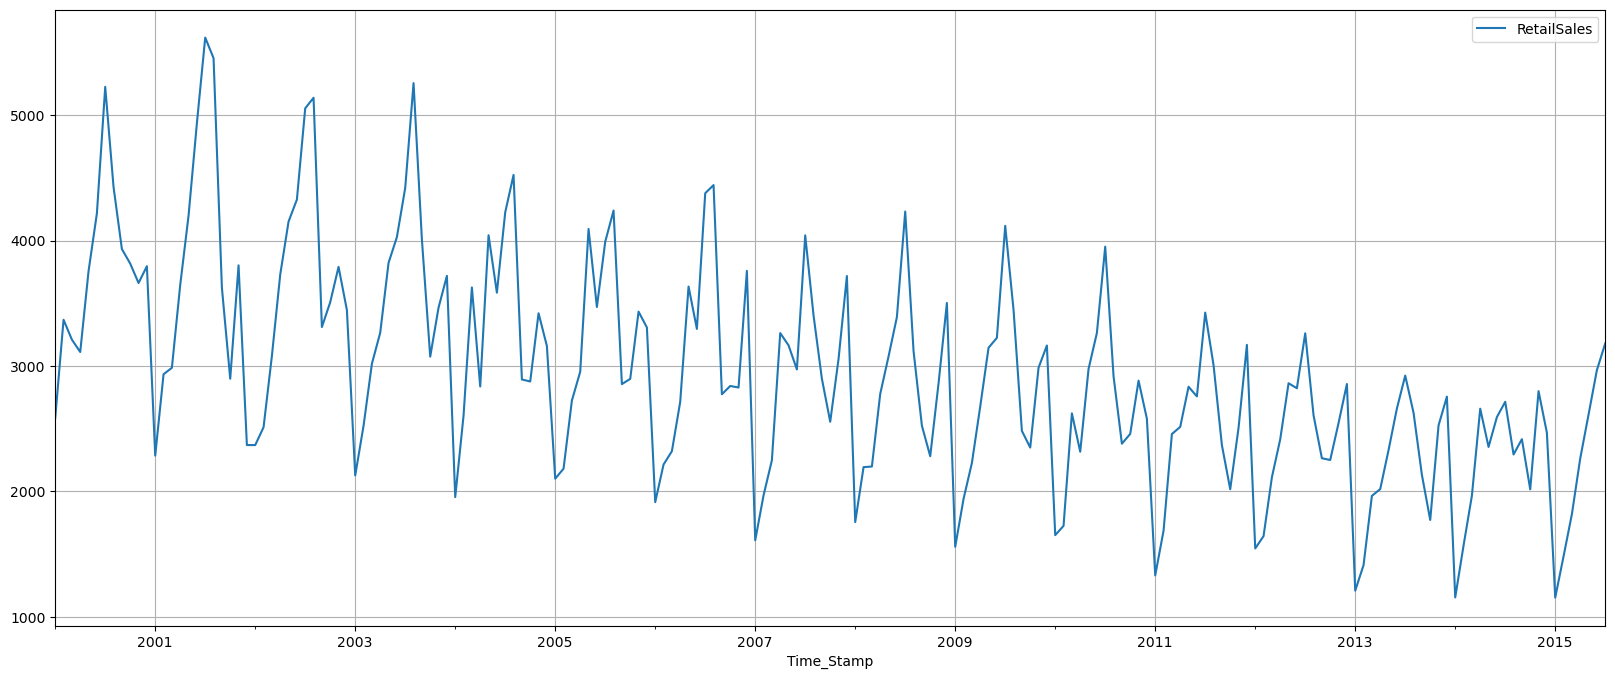

In [9]:
df.plot()
plt.grid();

We can see that there is a slight downward trend with a seasonal pattern associated as well.

## Check the basic measures of descriptive statistics

In [10]:
df.describe()

RetailSales
count   187.000000
mean   2962.304813
std     878.968431
min    1153.000000
25%    2361.500000
50%    2876.000000
75%    3467.500000
max    5618.000000

The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

## Plot a boxplot to understand the spread of accidents across different years and within different months across years.

### Yearly Boxplot

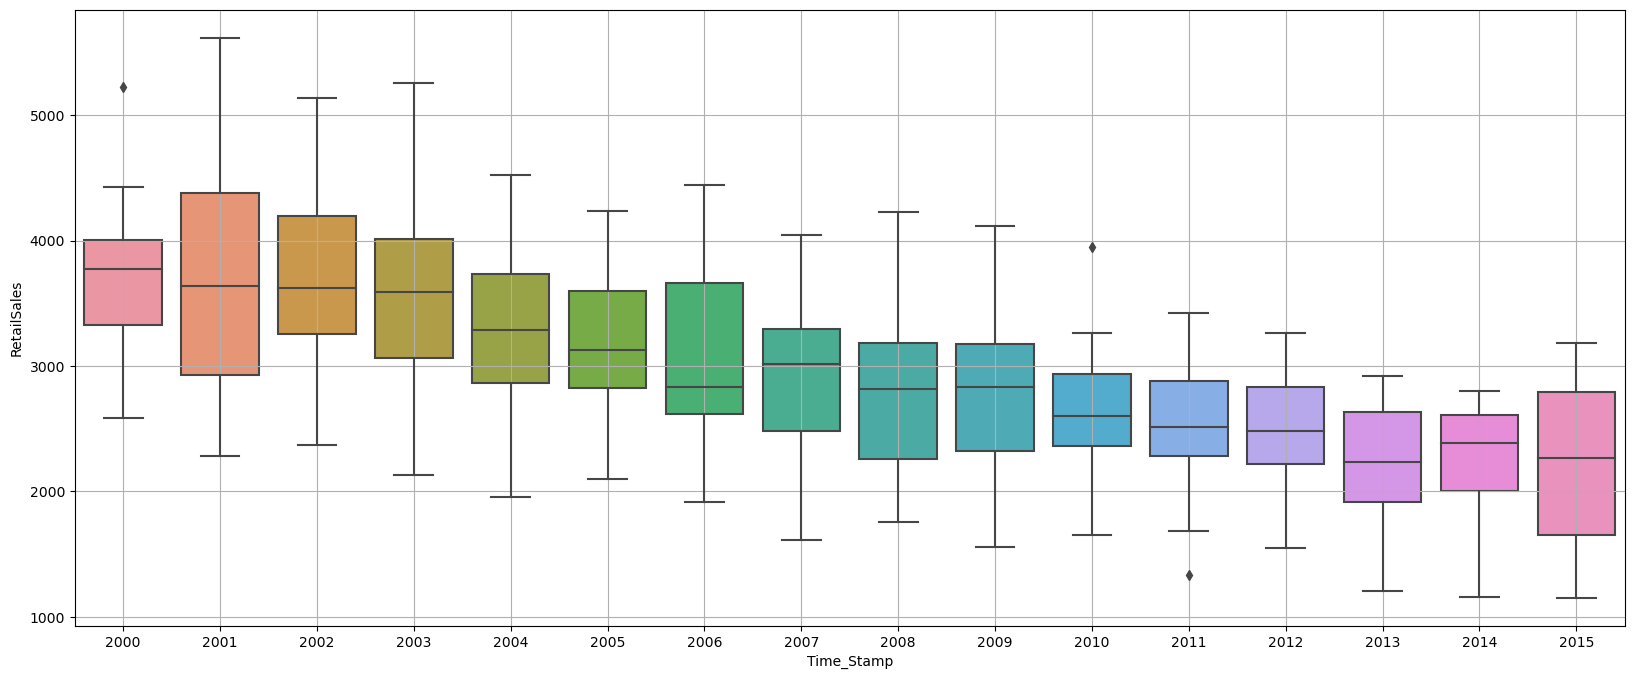

In [11]:
sns.boxplot(x = df.index.year,y = df['RetailSales'])
plt.grid();

The yearly boxplots also shows that the Sales have decreased towards the last few years.

### Monthly Plot

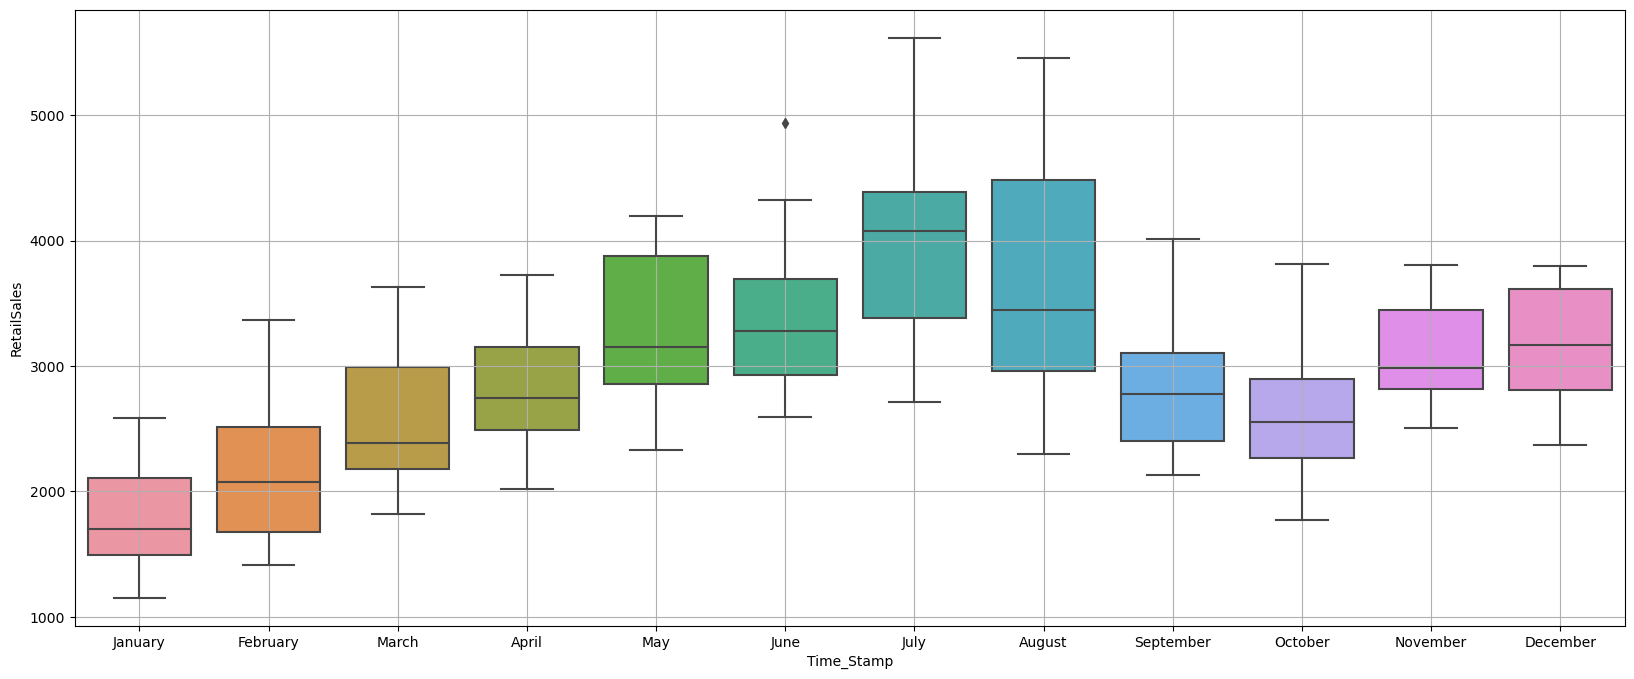

In [12]:
sns.boxplot(x = df.index.month_name(),y = df['RetailSales'])
plt.grid();

There is a clear distinction of 'RetailSales' within different months spread across various years. The highest such numbers are being recorded in the month of July-August across various years.

## Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

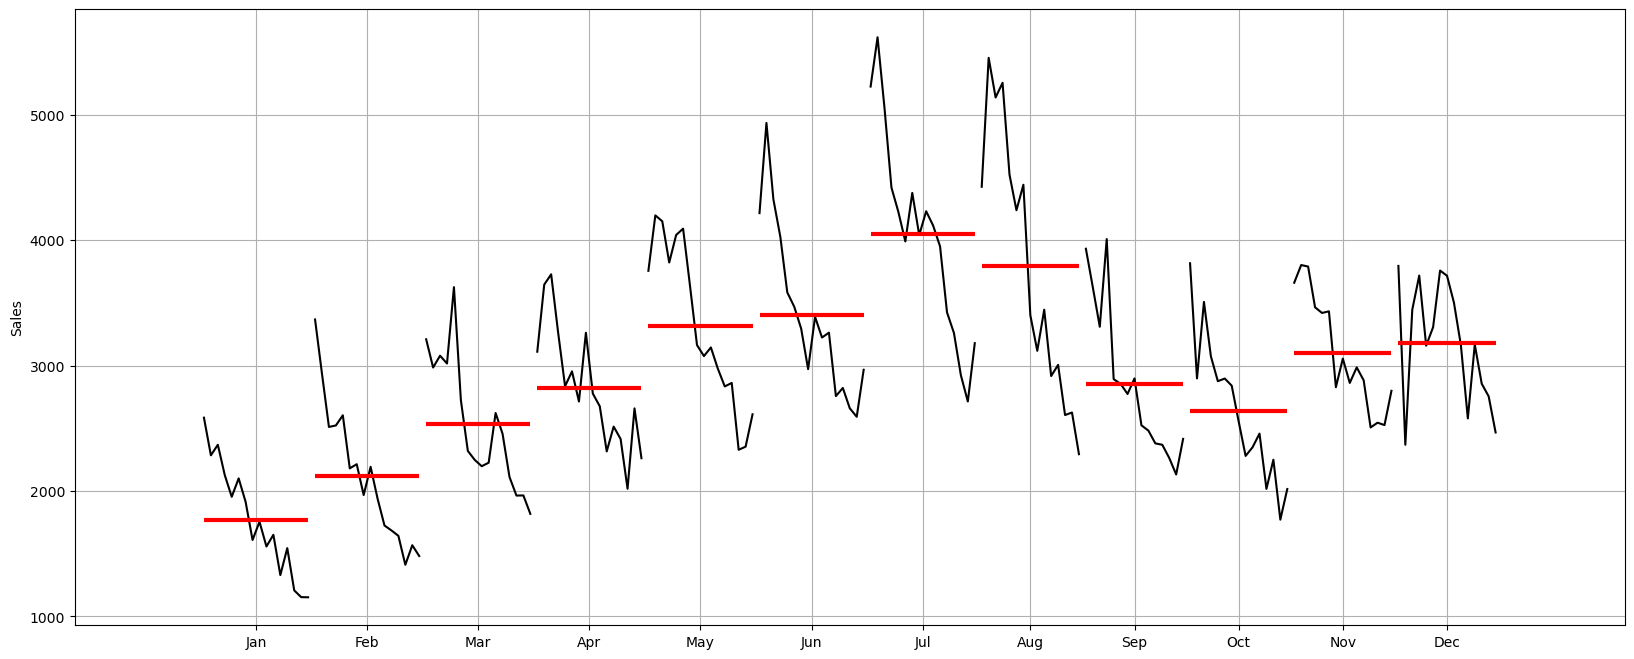

In [13]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['RetailSales'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('RetailSales' in this case) across various months. The red line is the median value.

## Plot a graph of monthly RetailSales across years.

In [14]:
## For colouring tables
## Visit https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html    
monthly_sales_across_years = pd.pivot_table(df, values = 'RetailSales', columns = df.index.month, index = df.index.year)
monthly_sales_across_years.style.highlight_max()

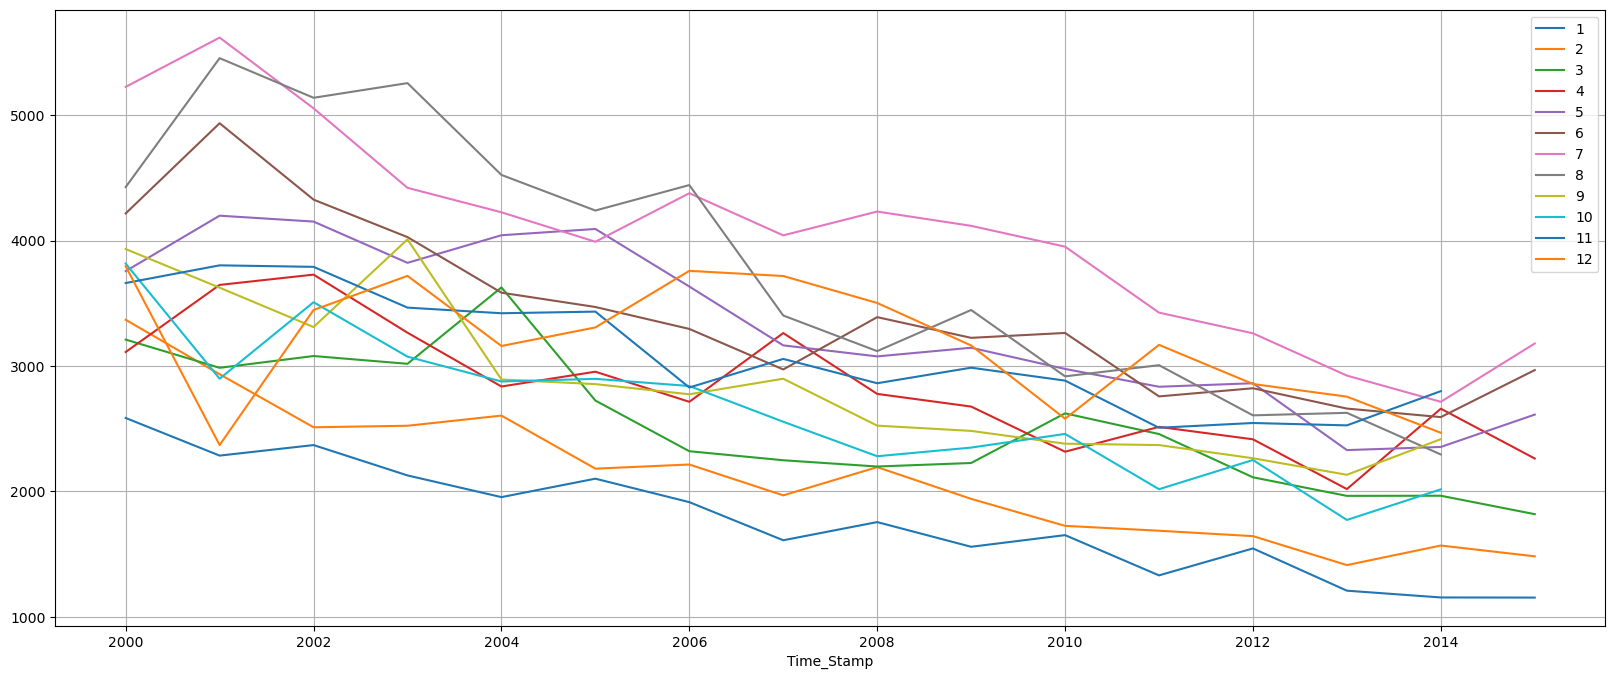

In [15]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

## Plot the Empirical Cumulative Distribution.

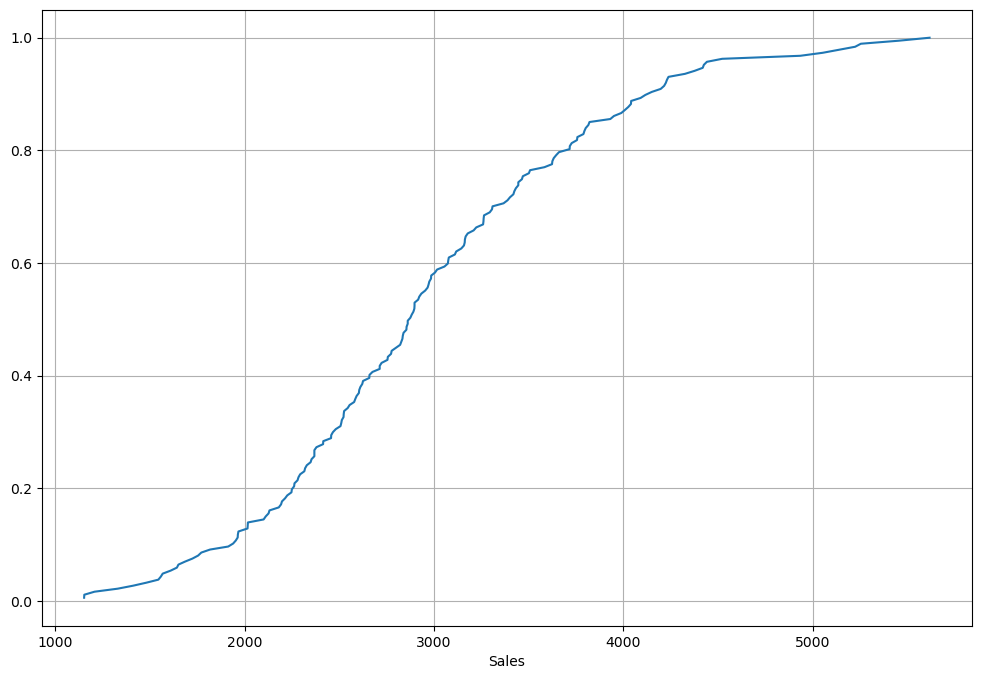

In [16]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (12, 8))
cdf = ECDF(df['RetailSales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales. 60% od the sales are below 3000. Maximum sales is close 5600

## Plot the average RetailSales per month and the month on month percentage change of RetailSales.

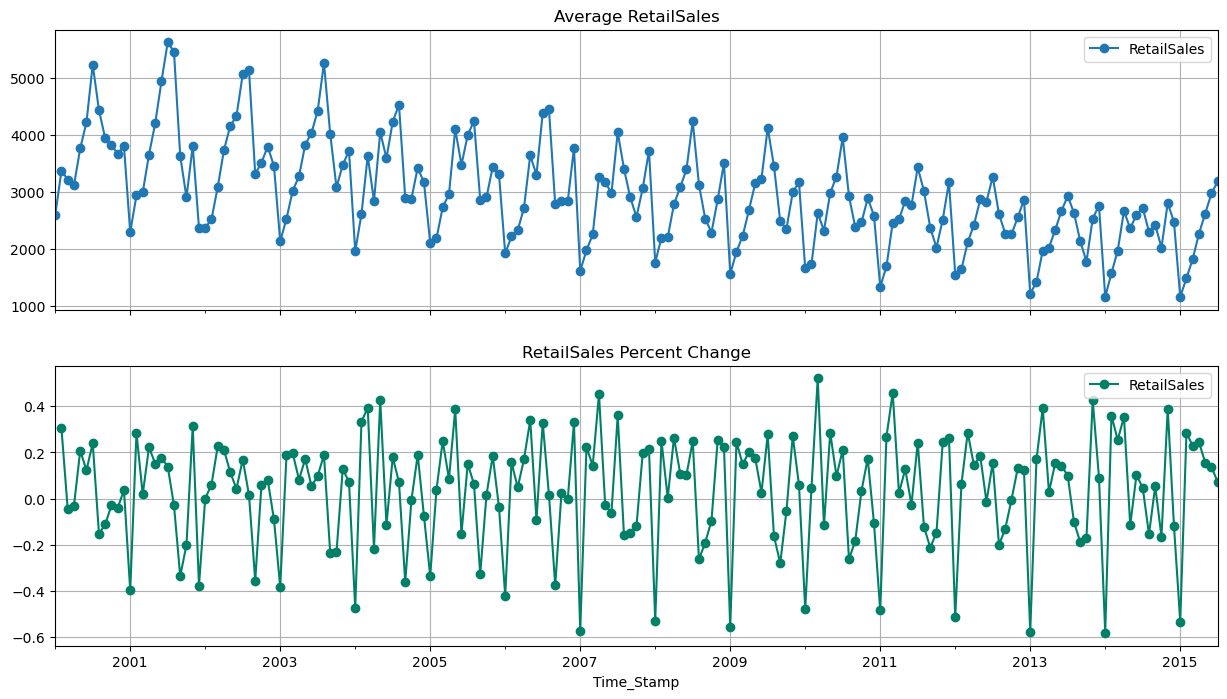

In [17]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["RetailSales"].mean()
pct_change = df.groupby(df.index)["RetailSales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average RetailSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RetailSales Percent Change",grid=True)

The above two graphs tells us the Average 'RetailSales' and the Percentage change of 'RetailSales' with respect to the time.

## Decompose the Time Series and plot the different components.

In [18]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

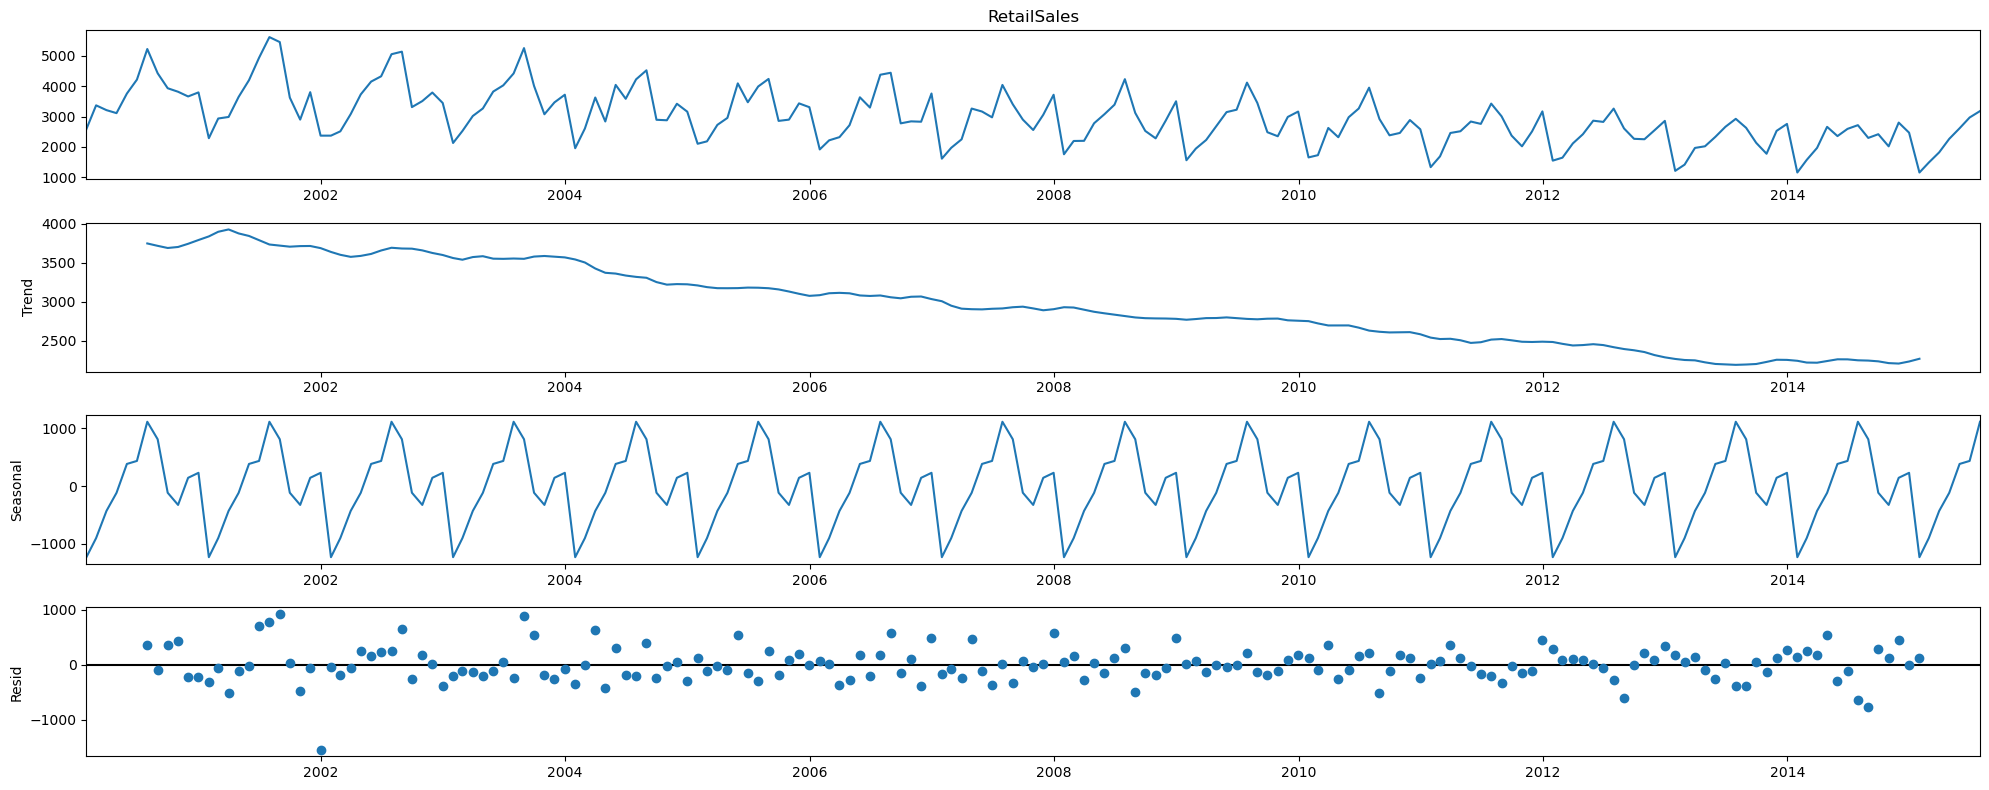

In [19]:
decomposition = seasonal_decompose(df['RetailSales'],model='additive')
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [20]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2000-01-31            NaN
2000-02-29            NaN
2000-03-31            NaN
2000-04-30            NaN
2000-05-31            NaN
2000-06-30            NaN
2000-07-31    3745.916667
2000-08-31    3715.333333
2000-09-30    3687.875000
2000-10-31    3700.791667
2000-11-30    3741.500000
2000-12-31    3789.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2000-01-31   -1230.608333
2000-02-29    -900.364286
2000-03-31    -429.435714
2000-04-30    -116.923810
2000-05-31     383.713095
2000-06-30     435.802381
2000-07-31    1113.975000
2000-08-31     811.258333
2000-09-30    -115.036111
2000-10-31    -325.811111
2000-11-30     143.525000
2000-12-31     229.905556
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2000-01-31           NaN
2000-02-29           NaN
2000-03-31           NaN
2000-04-30           NaN
2000-05-31           NaN
2000-06-30           NaN
2000-07-31    365.108333
2000-08-31   -100.591667
2000-09-30    359.161111
2000-10-31    441.0194

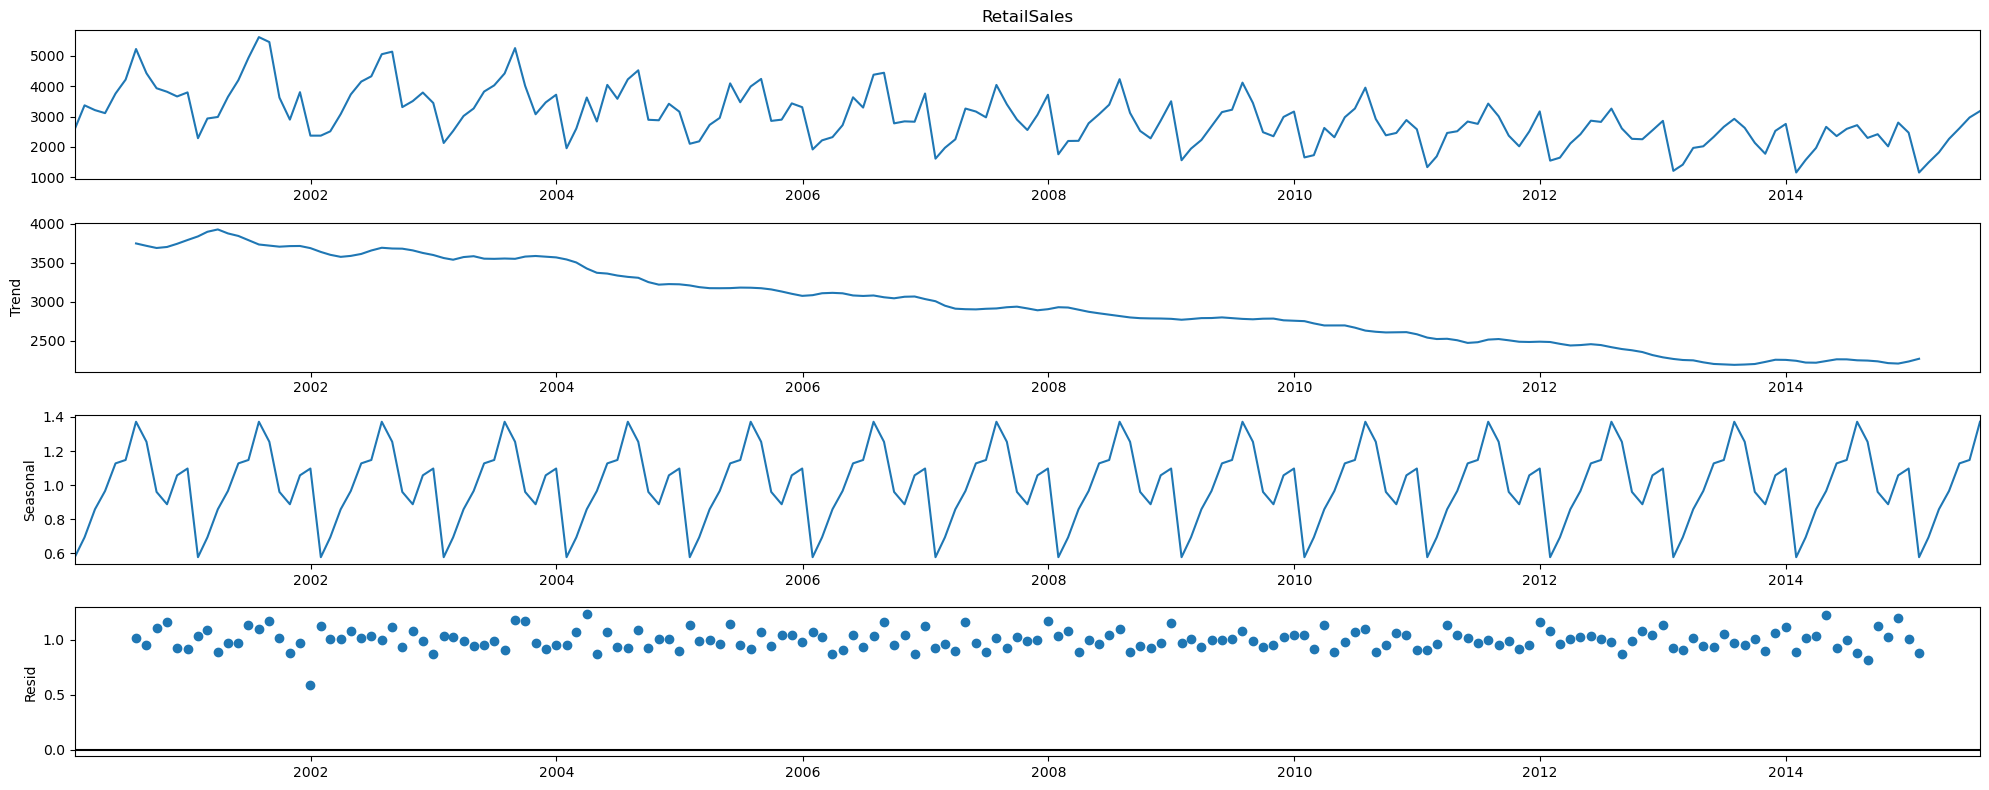

In [21]:
decomposition = seasonal_decompose(df['RetailSales'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [22]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2000-01-31            NaN
2000-02-29            NaN
2000-03-31            NaN
2000-04-30            NaN
2000-05-31            NaN
2000-06-30            NaN
2000-07-31    3745.916667
2000-08-31    3715.333333
2000-09-30    3687.875000
2000-10-31    3700.791667
2000-11-30    3741.500000
2000-12-31    3789.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2000-01-31    0.577667
2000-02-29    0.693995
2000-03-31    0.858591
2000-04-30    0.965907
2000-05-31    1.127574
2000-06-30    1.147570
2000-07-31    1.371537
2000-08-31    1.254060
2000-09-30    0.960255
2000-10-31    0.887973
2000-11-30    1.057467
2000-12-31    1.097405
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2000-01-31         NaN
2000-02-29         NaN
2000-03-31         NaN
2000-04-30         NaN
2000-05-31         NaN
2000-06-30         NaN
2000-07-31    1.017000
2000-08-31    0.949938
2000-09-30    1.110327
2000-10-31    1.161218
2000-11-30    0.925310
2000-12-31    0.912473
Name: r

## Check for stationarity of the whole Time Series data.

### Dicky Fuller Test

### Null Hypothesis H0- Series is not Stationary   
### Alternative Hypothesis H1-  Series is Stationary 

In [23]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False) ## You plot will stay open - will be seen always
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

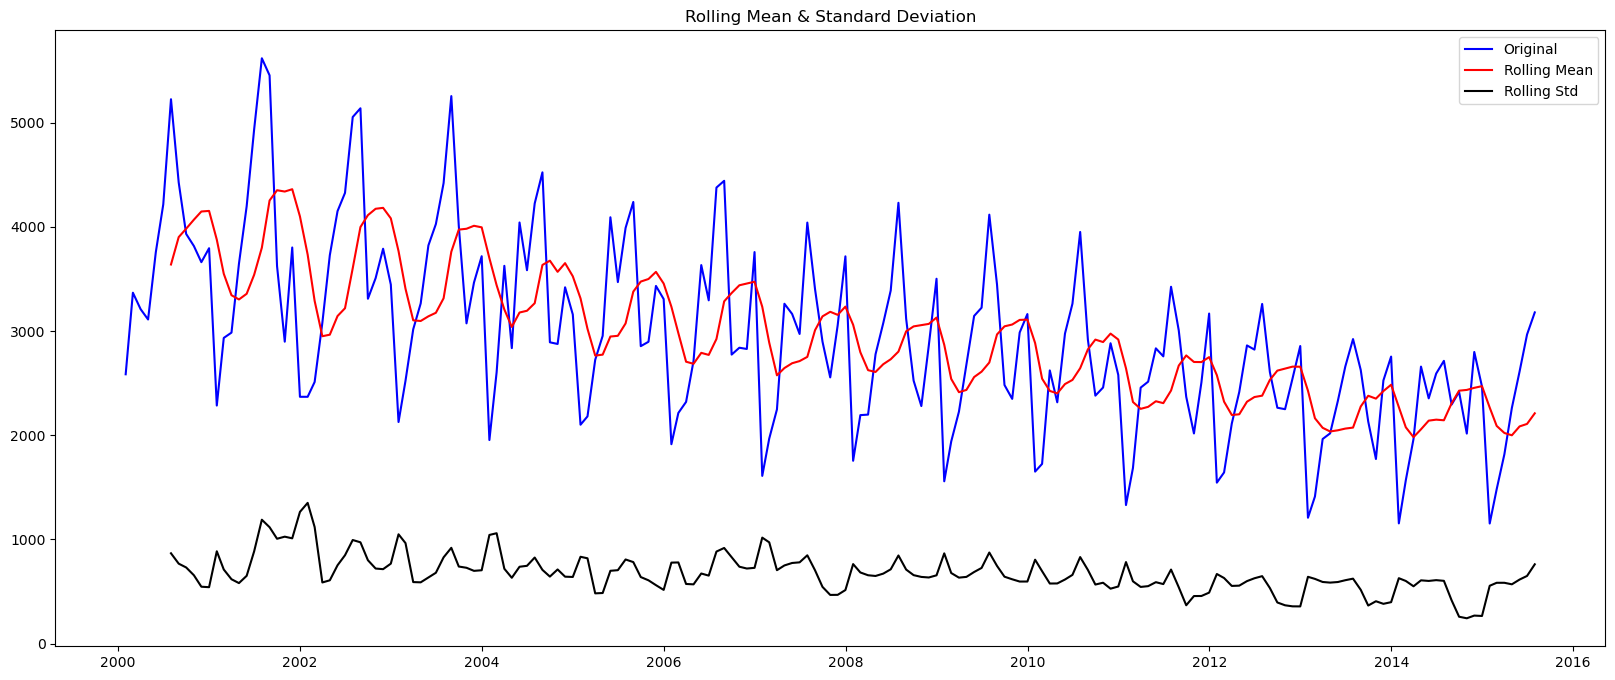

Results of Dickey-Fuller Test:
Test Statistic                  -0.907380
p-value                          0.785532
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [24]:
test_stationarity(df['RetailSales'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

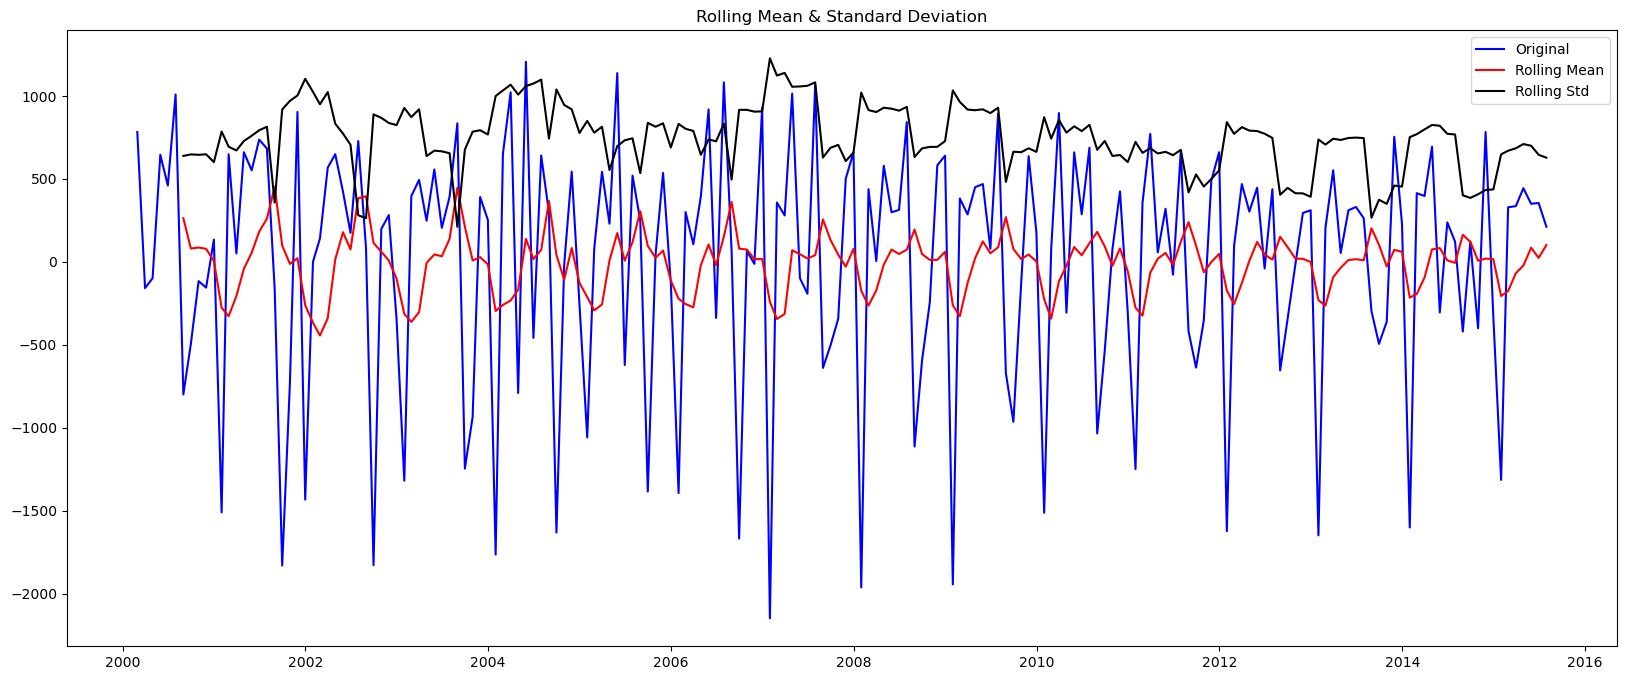

Results of Dickey-Fuller Test:
Test Statistic                 -23.500036
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [25]:
test_stationarity(df['RetailSales'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

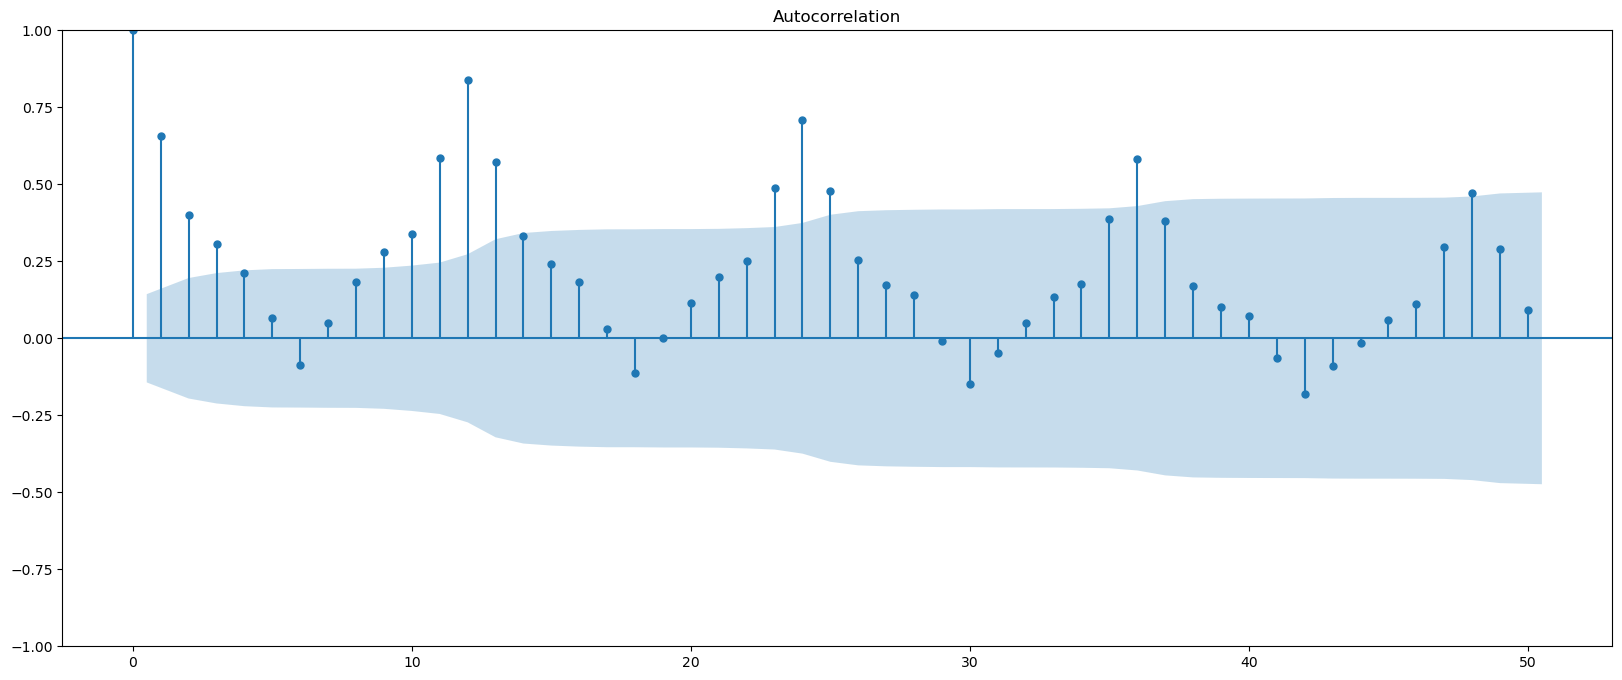

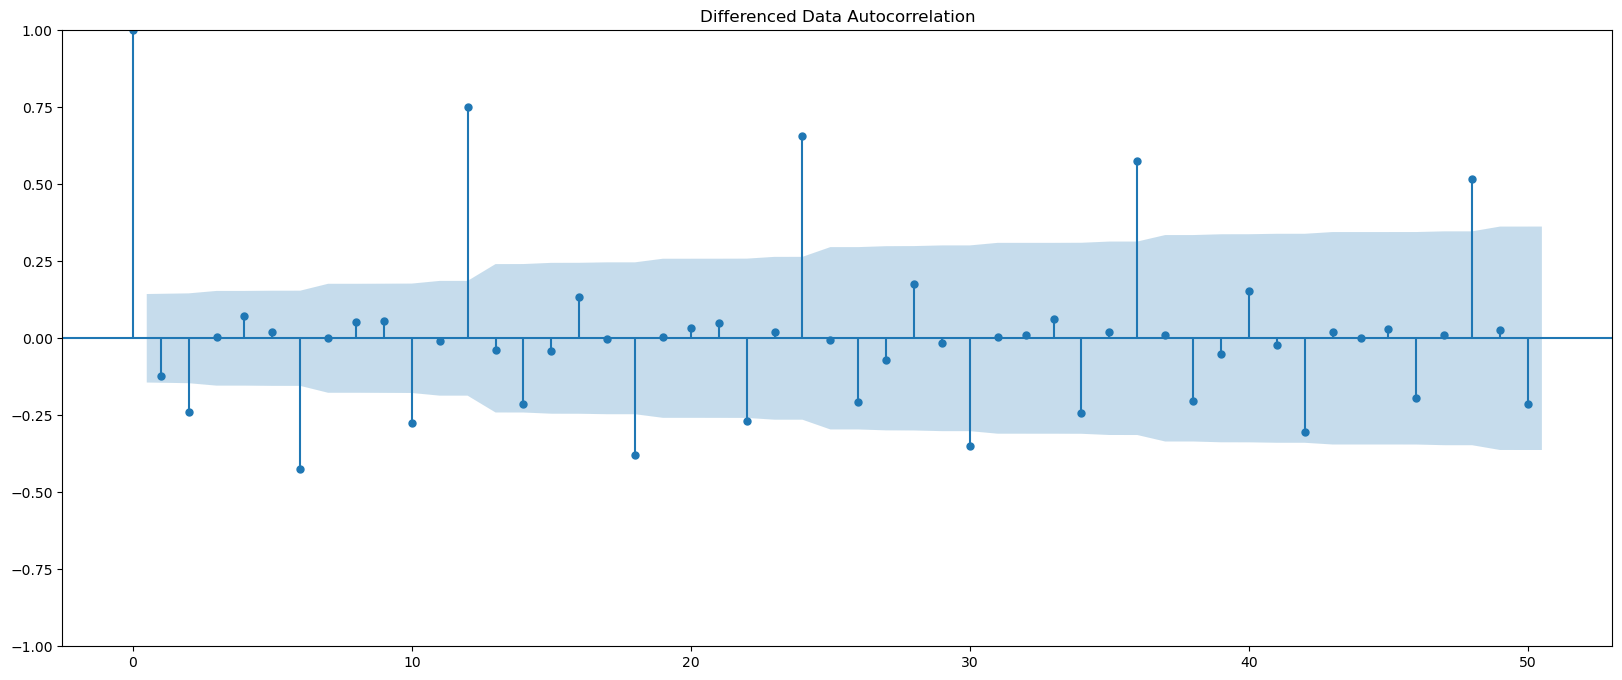

In [27]:
plot_acf(df['RetailSales'],lags=50)
plot_acf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

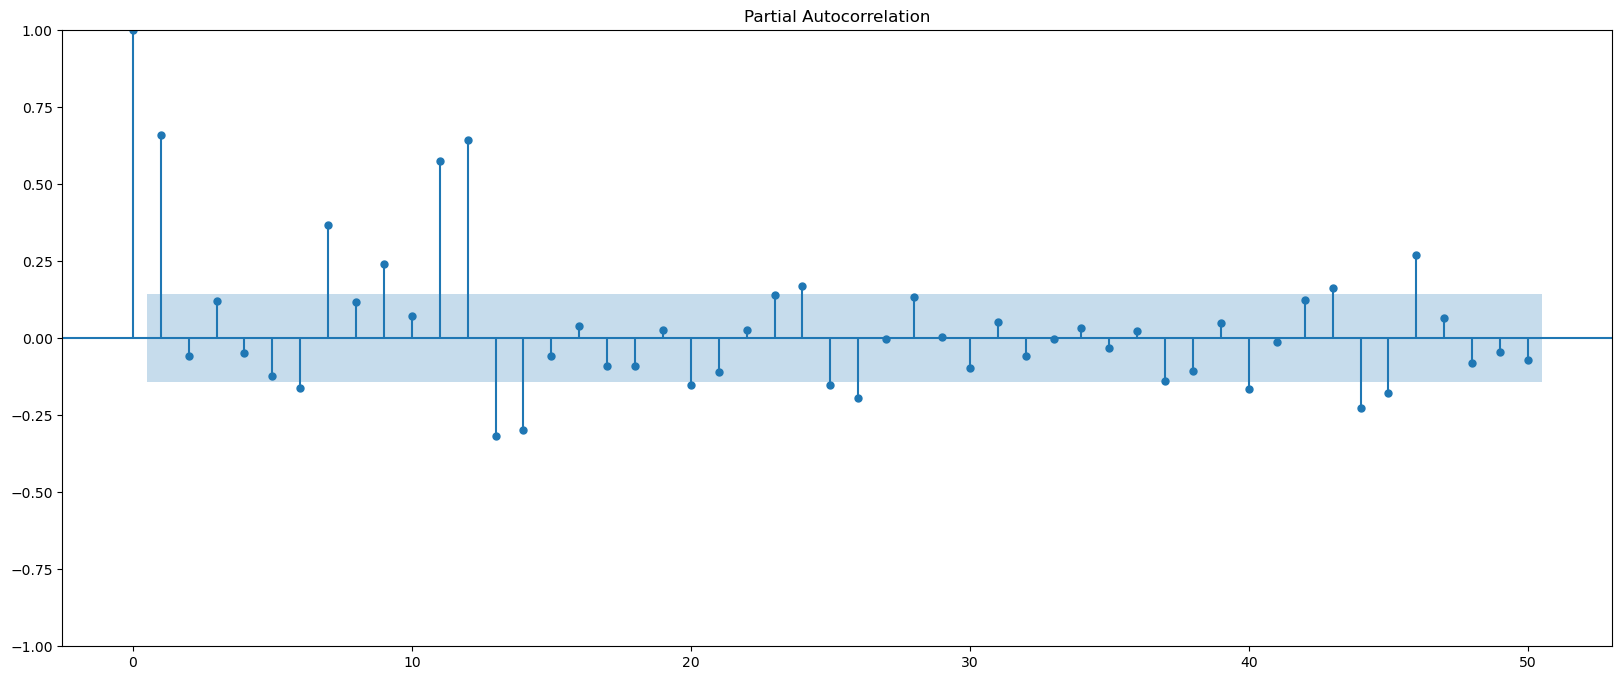

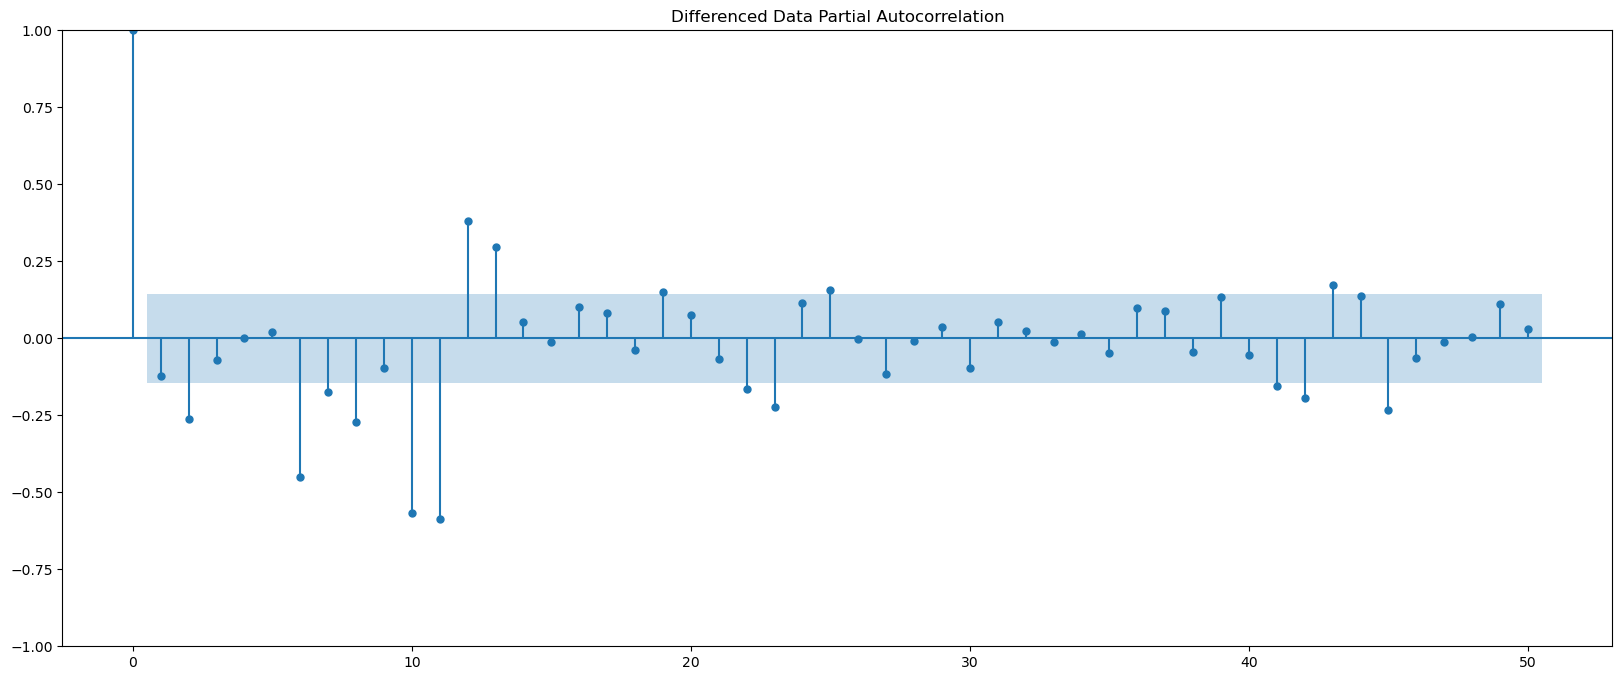

In [28]:
plot_pacf(df['RetailSales'],lags=50)
plot_pacf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 2010. Test Data is from the beginning of 2011 to the last time stamp provided.

In [29]:
train=df[df.index.year < 2011]
test=df[df.index.year >= 2011]

In [30]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [31]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


RetailSales
Time_Stamp             
2000-01-31         2585
2000-02-29         3368
2000-03-31         3210
2000-04-30         3111
2000-05-31         3756

Last few rows of Training Data


RetailSales
Time_Stamp             
2010-08-31         2917
2010-09-30         2380
2010-10-31         2458
2010-11-30         2883
2010-12-31         2579

First few rows of Test Data


RetailSales
Time_Stamp             
2011-01-31         1330
2011-02-28         1686
2011-03-31         2457
2011-04-30         2514
2011-05-31         2834

Last few rows of Test Data


RetailSales
Time_Stamp             
2015-03-31         1818
2015-04-30         2262
2015-05-31         2612
2015-06-30         2967
2015-07-31         3179

In [32]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Check for stationarity of the Training Data Time Series.

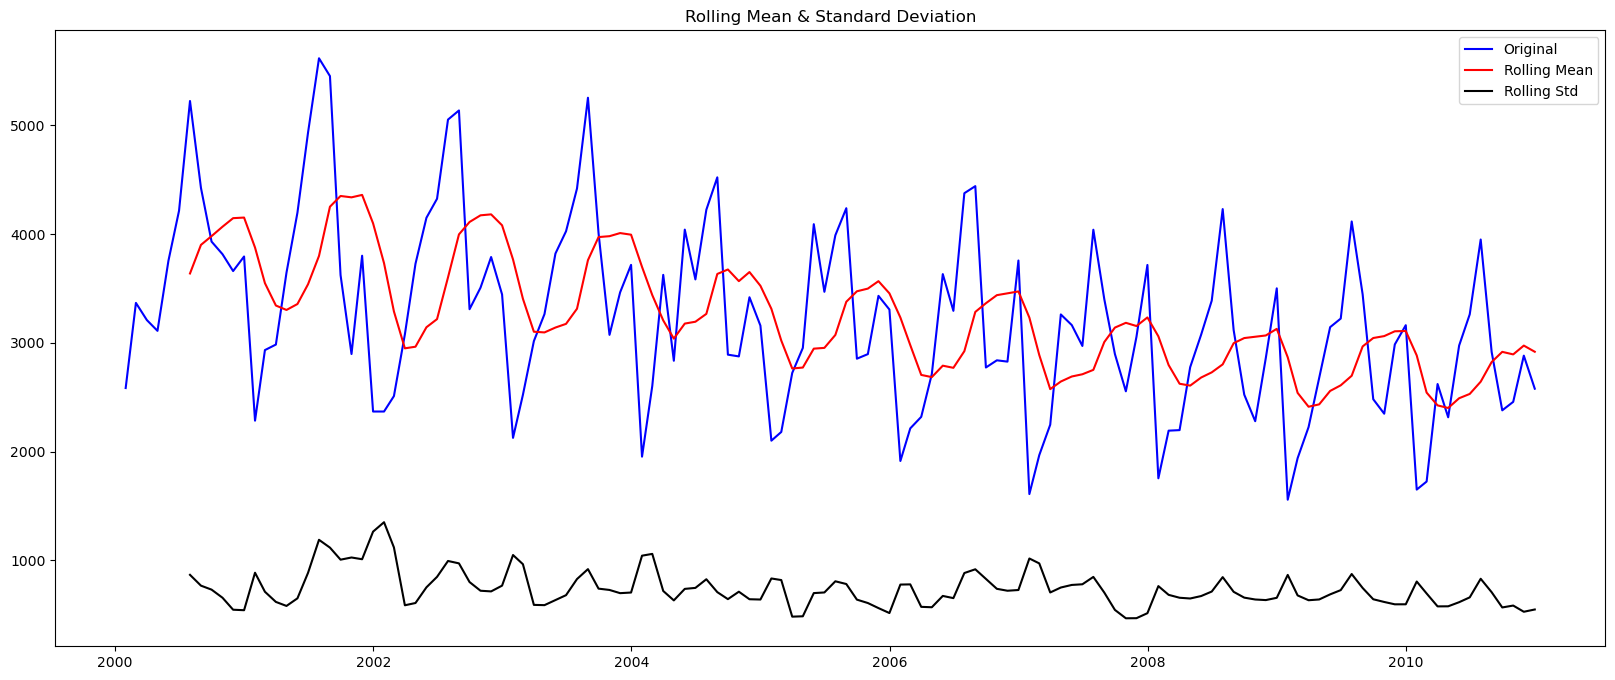

Results of Dickey-Fuller Test:
Test Statistic                  -0.380788
p-value                          0.913257
#Lags Used                      11.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64 



In [33]:
test_stationarity(train['RetailSales'])

We see that the series is not stationary at $\alpha$ = 0.05.

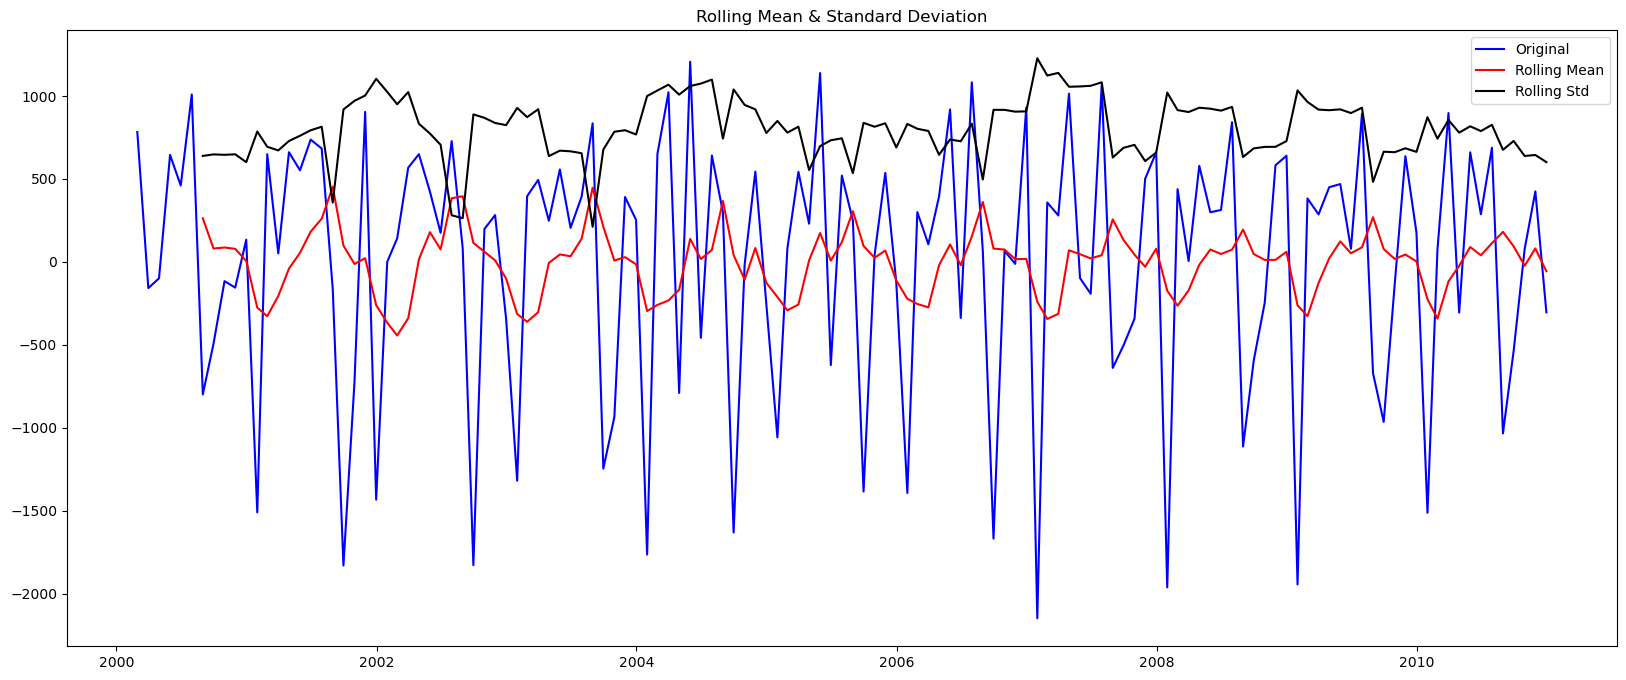

Results of Dickey-Fuller Test:
Test Statistic                 -18.948648
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64 



In [34]:
test_stationarity(train['RetailSales'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2000-01-31 to 2010-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   RetailSales  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [36]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [37]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [38]:
#from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

for param in pdq:
    ARIMA_model = sm.tsa.arima.ARIMA(train['RetailSales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2116.919379651664
ARIMA(0, 1, 1) - AIC:2115.4864178273983
ARIMA(0, 1, 2) - AIC:2094.884078807593
ARIMA(1, 1, 0) - AIC:2116.9908607756342
ARIMA(1, 1, 1) - AIC:2093.885726693338
ARIMA(1, 1, 2) - AIC:2093.3577605811815
ARIMA(2, 1, 0) - AIC:2111.832093495572
ARIMA(2, 1, 1) - AIC:2093.5110518132697
ARIMA(2, 1, 2) - AIC:2093.3415521931274


In [39]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2093.341552
5  (1, 1, 2)  2093.357761
7  (2, 1, 1)  2093.511052
4  (1, 1, 1)  2093.885727
2  (0, 1, 2)  2094.884079
6  (2, 1, 0)  2111.832093
1  (0, 1, 1)  2115.486418
0  (0, 1, 0)  2116.919380
3  (1, 1, 0)  2116.990861

In [40]:
# Apply the ARIMA Model
# Top box -  Gives the overall summary
# Middle box -  Gives the coefficients and tells if the varibales are significant
# Lower box(Roots) - If the model is stable and good for forecasting.Between Imaginary & Real you draw a circle and check
# if the values/roots are inside the circle
auto_ARIMA = sm.tsa.arima.ARIMA(train['RetailSales'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            RetailSales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1041.671
Date:                Fri, 01 Dec 2023   AIC                           2093.342
Time:                        08:25:35   BIC                           2107.718
Sample:                    01-31-2000   HQIC                          2099.183
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2113      0.238     -0.887      0.375      -0.678       0.256
ar.L2          0.3356      0.153      2.192      0.028       0.036       0.636
ma.L1         -0.1240      0.187     -0.664      0.5

## Predict on the Test Set using this model and evaluate the model.

In [41]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [42]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['RetailSales'],predicted_auto_ARIMA,squared=False)
print(rmse)

755.6196826368686


In [43]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

RMSE
ARIMA(2,1,2)  755.619683

In [44]:
auto_ARIMA = sm.tsa.arima.ARIMA(train['RetailSales'], order=(1,1,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:            RetailSales   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1043.943
Date:                Fri, 01 Dec 2023   AIC                           2093.886
Time:                        08:25:41   BIC                           2102.511
Sample:                    01-31-2000   HQIC                          2097.391
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5481      0.089      6.165      0.000       0.374       0.722
ma.L1         -0.9666      0.037    -26.045      0.000      -1.039      -0.894
sigma2      4.781e+05   5.76e+04      8.307      0.0

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [45]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [46]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['RetailSales'],predicted_auto_ARIMA,squared=False)
print(rmse)

771.9831459866685


In [47]:
tempresultsDf1 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,1,1)'])
resultsDf = pd.concat([resultsDf,tempresultsDf1])
resultsDf

RMSE
ARIMA(2,1,2)  755.619683
ARIMA(1,1,1)  771.983146

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

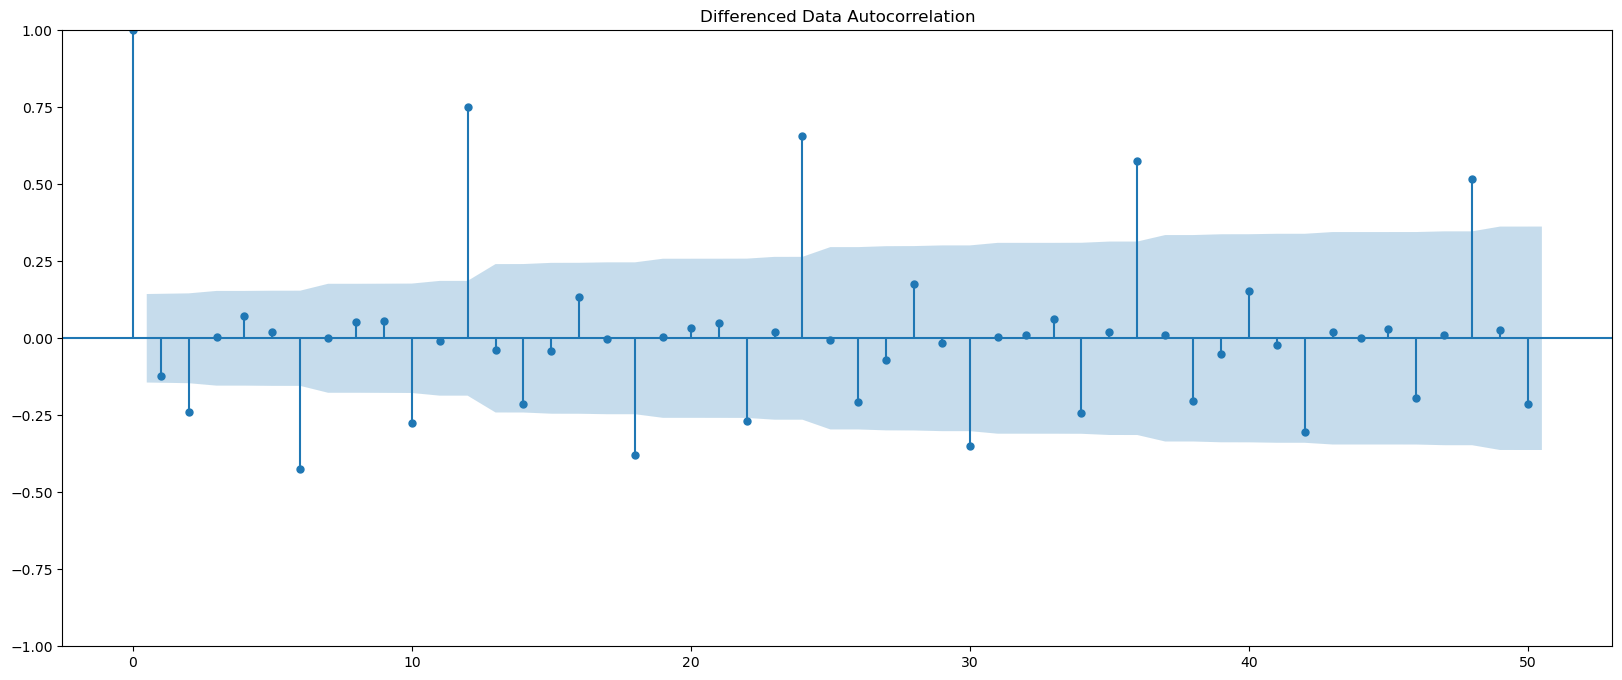

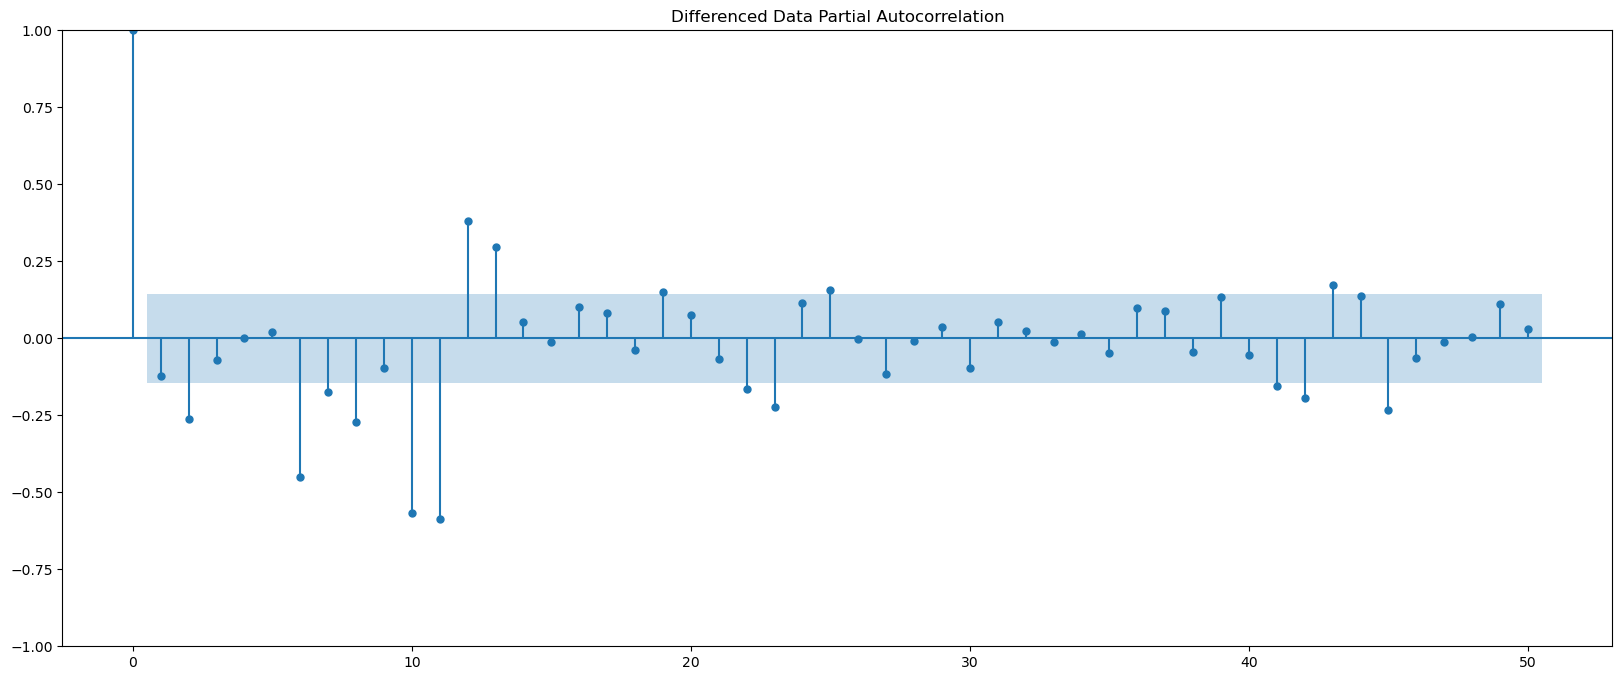

In [48]:
plot_acf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [49]:
manual_ARIMA = sm.tsa.arima.ARIMA(train['RetailSales'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:            RetailSales   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1057.460
Date:                Fri, 01 Dec 2023   AIC                           2116.919
Time:                        08:25:42   BIC                           2119.795
Sample:                    01-31-2000   HQIC                          2118.088
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.965e+05   6.99e+04      8.535      0.000     4.6e+05    7.34e+05
Ljung-Box (L1) (Q):                   2.30   Jarque-Bera (JB):                19.95
Prob(Q):                              0.13   Pr

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


We get a comparatively simpler model by looking at the ACF and the PACF plots.

###### Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.

## Predict on the Test Set using this model and evaluate the model.

In [50]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [51]:
rmse = mean_squared_error(test['RetailSales'],predicted_manual_ARIMA,squared=False)
print(rmse)

611.8600404429995


In [52]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)  755.619683
ARIMA(1,1,1)  771.983146
ARIMA(0,1,0)  611.860040

We see that there is difference in the RMSE values for both the models, but remember that the second model is a much simpler model.

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

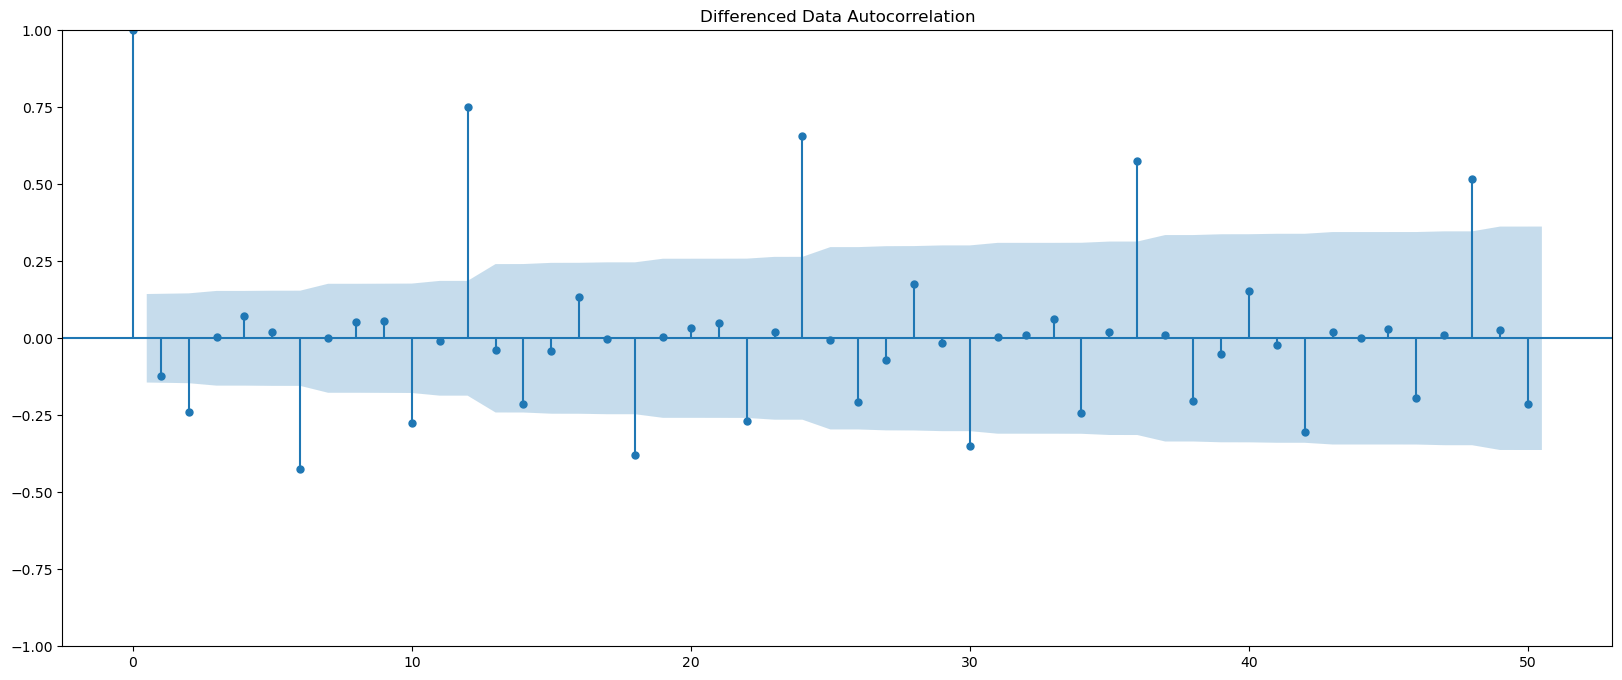

In [53]:
plot_acf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [54]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [55]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [56]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['RetailSales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,  ## by force you can make it TS stationary
                                            enforce_invertibility=False) ## Alpha and Beta should be unique
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2100.754859657318
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1999.1303300285767
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1848.6774723373028
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1998.8736001469529
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1935.9103915275607
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1825.9430235419227
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1821.618688209553
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1823.1746273022757
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1804.8184550694748
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2083.564992048796
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1978.4913995435984
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1816.2003051316033
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1963.9428854652078
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1862.5661457504966
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1754.7894678496837
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1762.6652967046477
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1764.3881095498466
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1721.477118836875
SARIMA(0, 1, 2)x(0, 0, 0, 6) - A

In [57]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
26  (0, 1, 2)  (2, 0, 2, 6)  1706.563179
53  (1, 1, 2)  (2, 0, 2, 6)  1708.901120
80  (2, 1, 2)  (2, 0, 2, 6)  1710.240405
17  (0, 1, 1)  (2, 0, 2, 6)  1721.477119
44  (1, 1, 1)  (2, 0, 2, 6)  1723.404522

In [58]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['RetailSales'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -846.282
Date:                           Fri, 01 Dec 2023   AIC                           1706.563
Time:                                   08:26:05   BIC                           1725.838
Sample:                                        0   HQIC                          1714.388
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9892      0.270     -3.665      0.000      -1.518      -0.460
ma.L2         -0.0108      0.097     -0.112

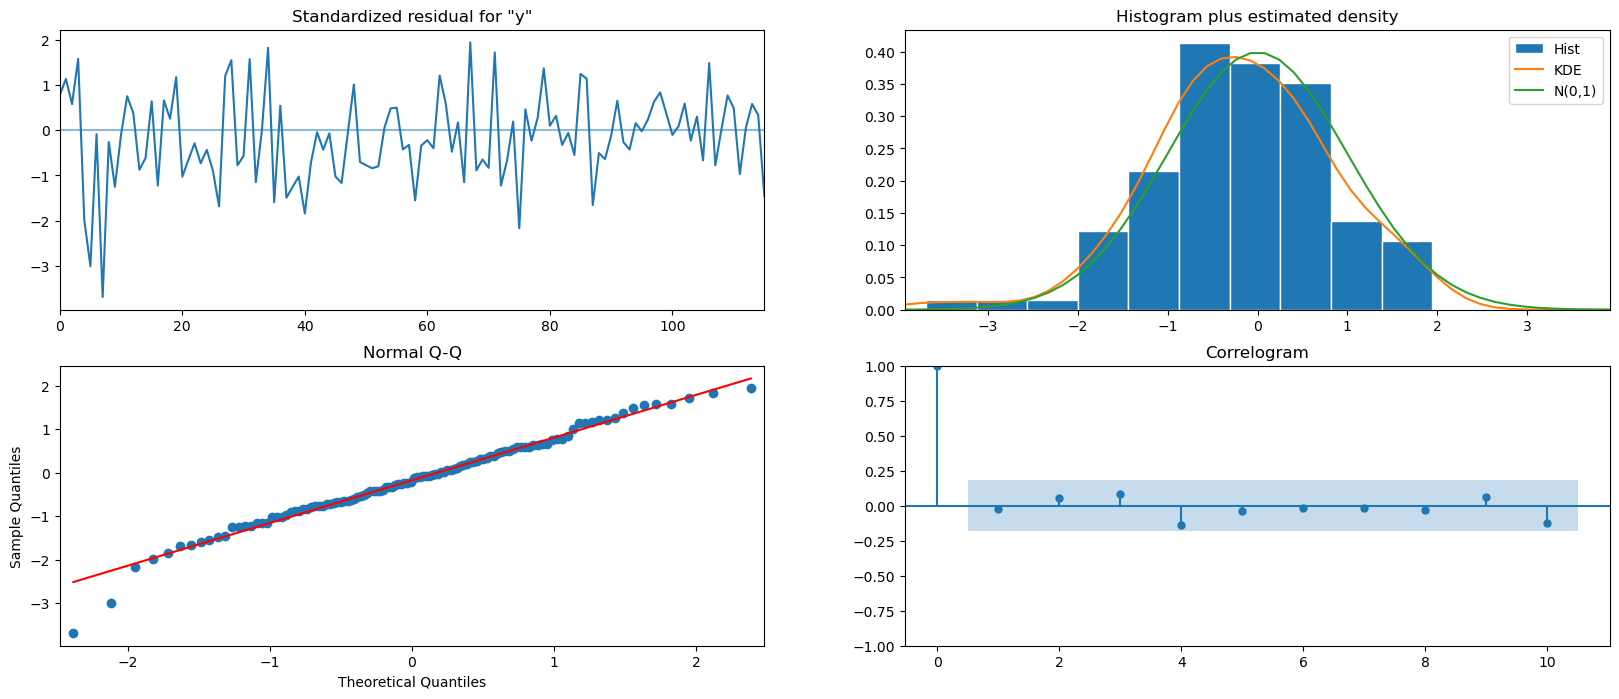

In [59]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

## Predict on the Test Set using this model and evaluate the model.

In [60]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [61]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1524.705371  345.050335     848.419141    2200.991601
1  1814.771150  345.118362    1138.351590    2491.190709
2  2222.027047  345.131634    1545.581475    2898.472618
3  2348.245780  345.131115    1671.801225    3024.690336
4  2850.851979  345.131085    2174.407482    3527.296476

In [62]:
rmse = mean_squared_error(test['RetailSales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

228.04967266055712


In [63]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)            755.619683
ARIMA(1,1,1)            771.983146
ARIMA(0,1,0)            611.860040
SARIMA(0,1,2)(2,0,2,6)  228.049673

We see that we have huge gain the RMSE value by including the seasonal parameters as well.

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [64]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [65]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [66]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['RetailSales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2100.754859657318
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1849.6576121215662
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1628.6341223623547
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1822.4703606139017
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1803.0984382777917
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1604.034787945626
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1613.240720775781
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1615.109817701138
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1600.5547789004409
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2083.564992048796
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1827.4180659666733
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1590.1846601888221
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1763.3867250008532
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1718.4543733964472
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1518.872078803564
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1543.255704231864
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1544.6704983661164
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1515.3748760914204
SARIMA(0, 1, 2)x(

In [67]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 12)  1503.095143
26  (0, 1, 2)  (2, 0, 2, 12)  1503.197771
80  (2, 1, 2)  (2, 0, 2, 12)  1504.145979
23  (0, 1, 2)  (1, 0, 2, 12)  1507.234153
50  (1, 1, 2)  (1, 0, 2, 12)  1508.483160

In [68]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['RetailSales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -743.548
Date:                            Fri, 01 Dec 2023   AIC                           1503.095
Time:                                    08:26:44   BIC                           1524.250
Sample:                                         0   HQIC                          1511.666
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6267      0.702     -0.893      0.372      -2.002       0.749
ma.L1         -0.3817      0.712   

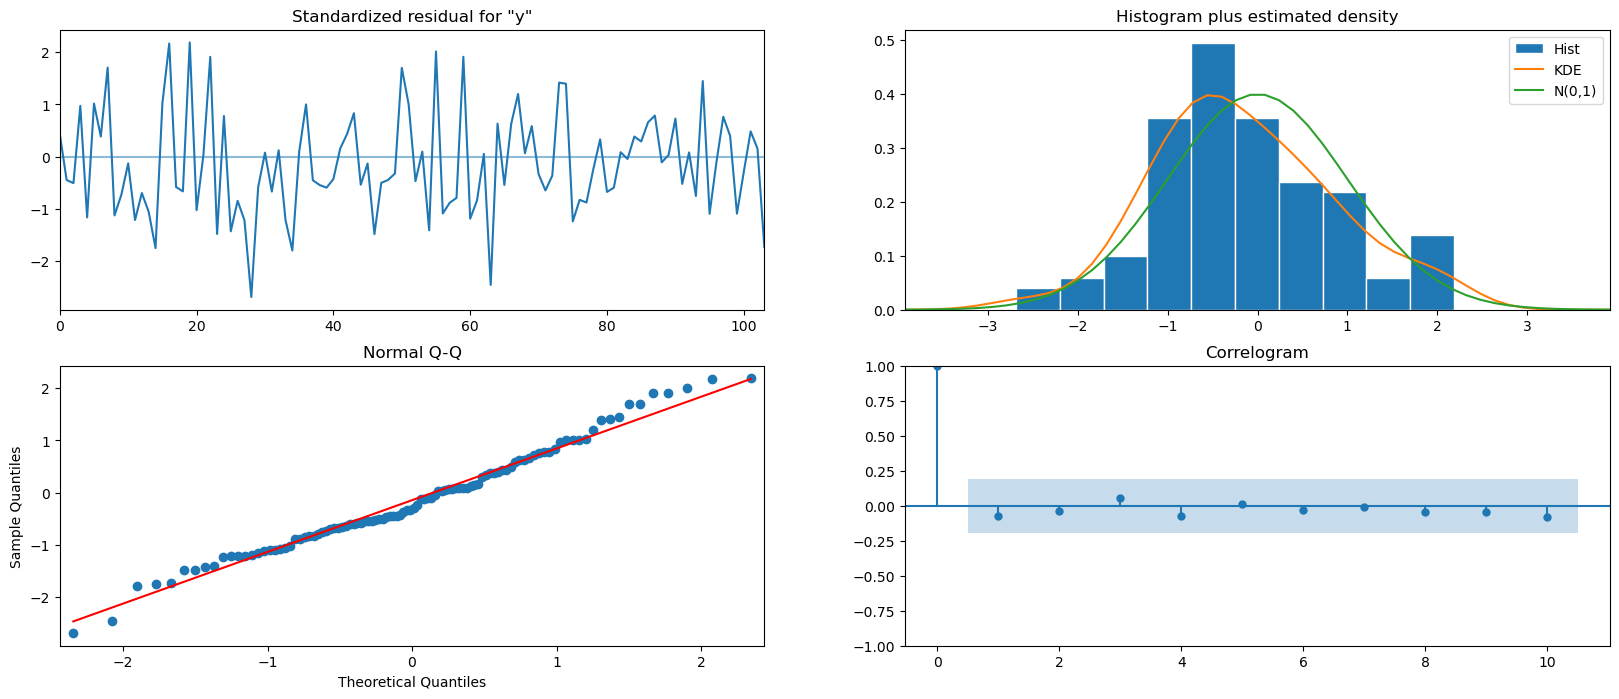

In [69]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

## Predict on the Test Set using this model and evaluate the model.

In [70]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [71]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1665.853035  302.523847    1072.917190    2258.788880
1  1814.281819  302.507696    1221.377630    2407.186007
2  2402.730021  302.527629    1809.786764    2995.673278
3  2359.031847  302.519316    1766.104883    2951.958811
4  2874.136221  302.526170    2281.195824    3467.076618

In [72]:
rmse = mean_squared_error(test['RetailSales'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

273.69996884793113


In [73]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)             755.619683
ARIMA(1,1,1)             771.983146
ARIMA(0,1,0)             611.860040
SARIMA(0,1,2)(2,0,2,6)   228.049673
SARIMA(1,1,2)(2,0,2,12)  273.699969

We see that the RMSE value have not reduced further when the seasonality parameter was changed to 12.

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

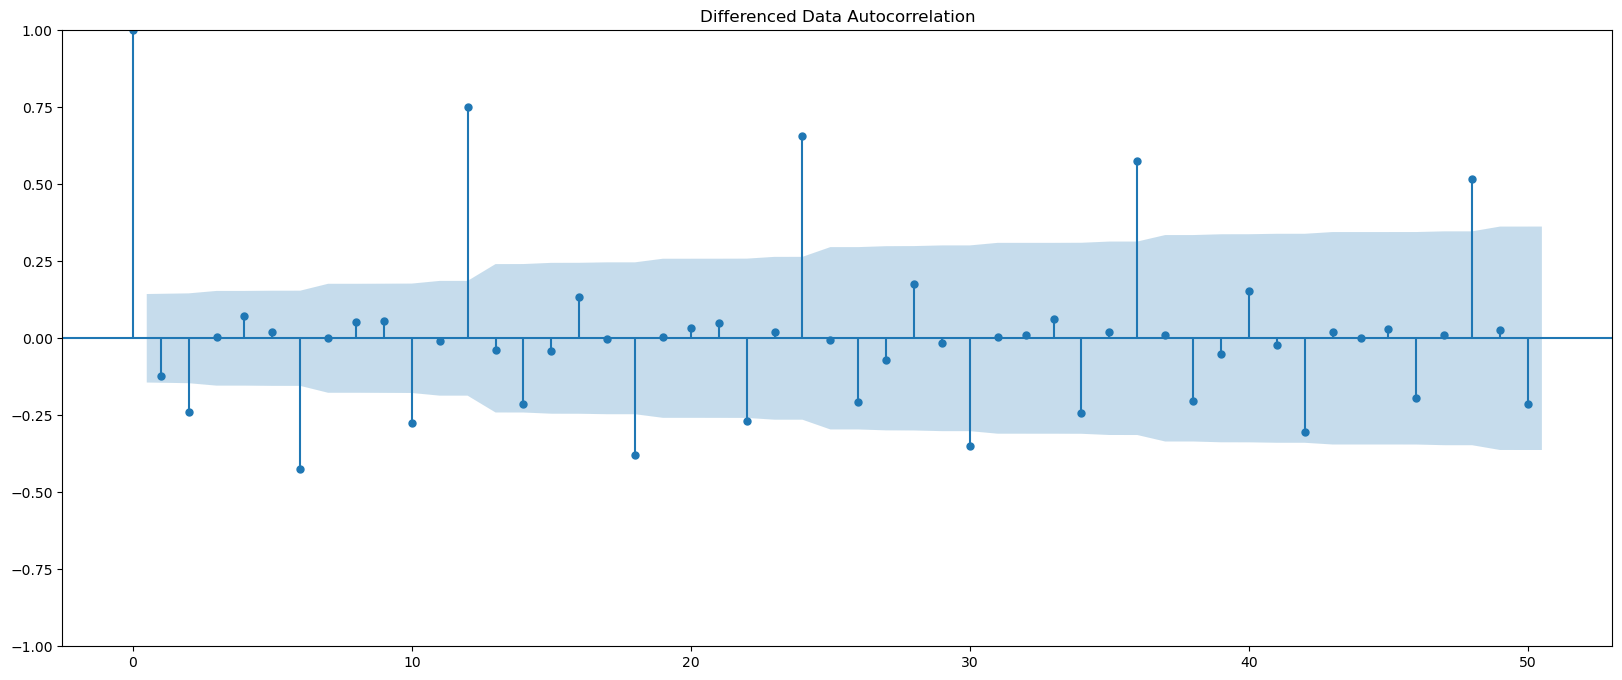

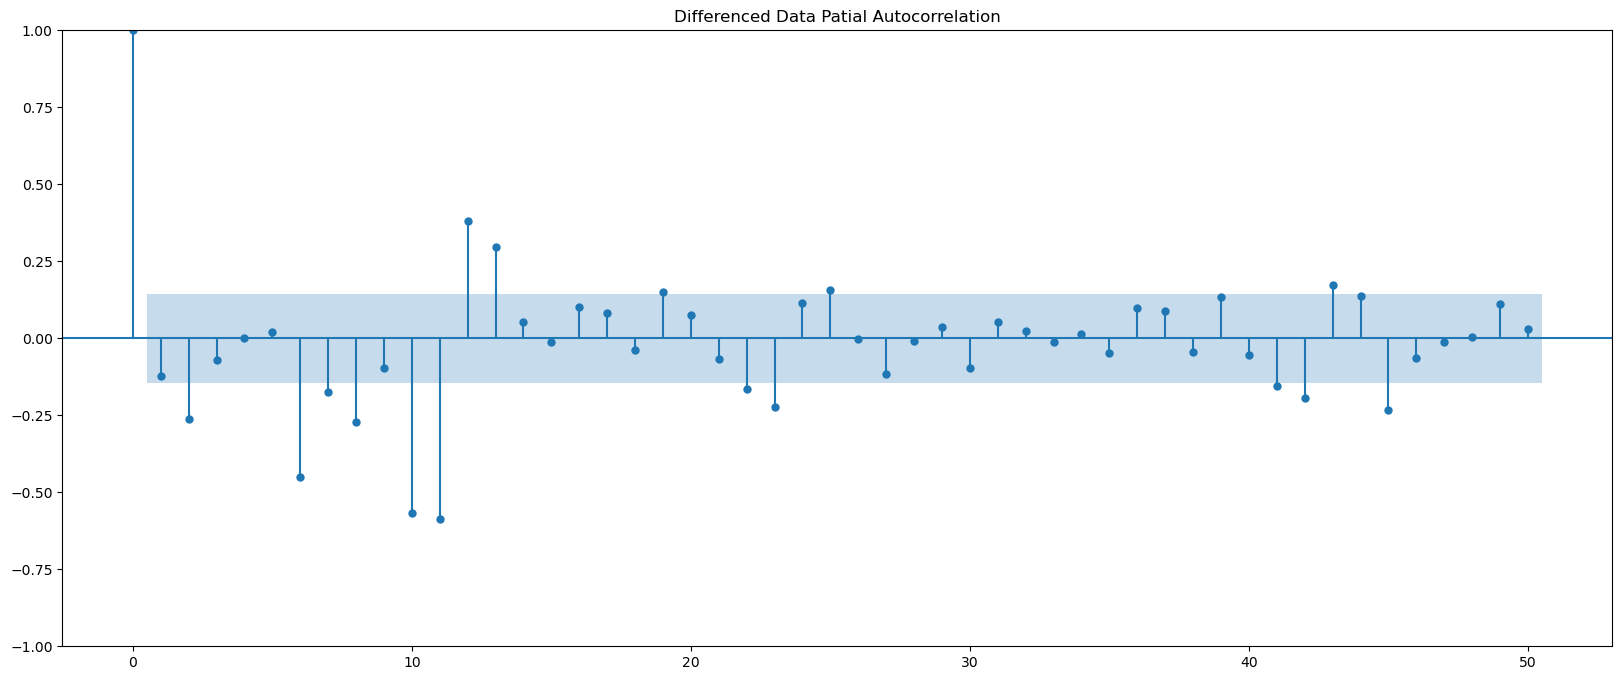

In [74]:
plot_acf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

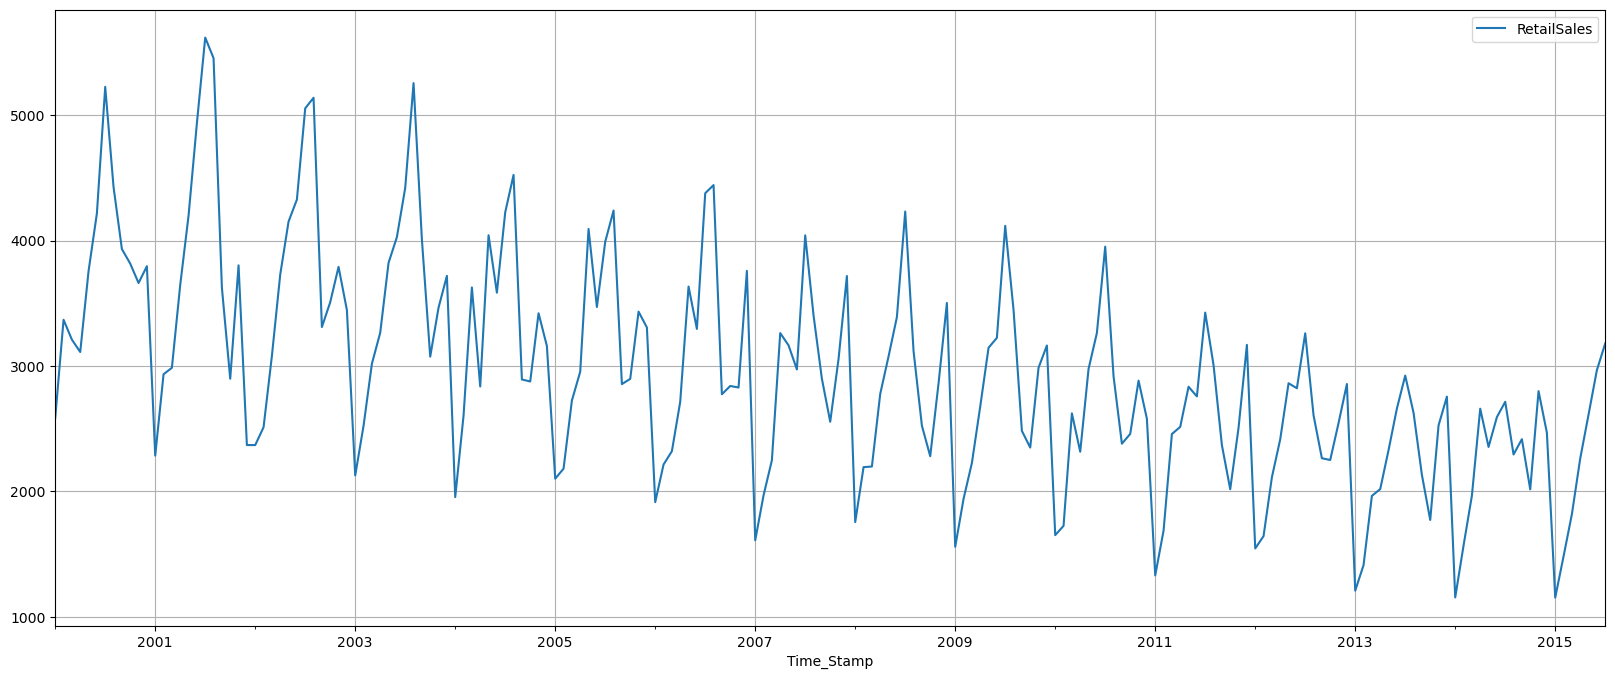

In [75]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

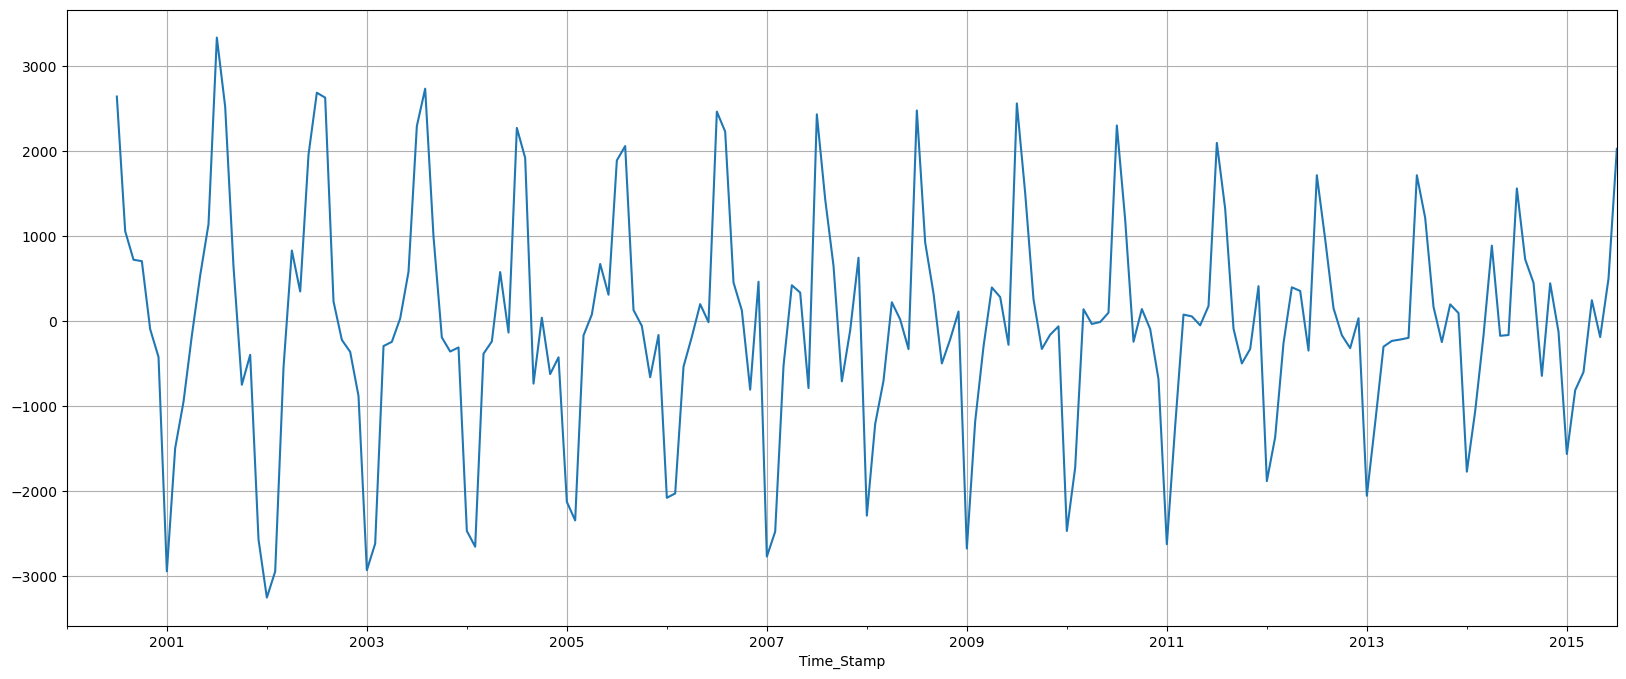

In [76]:
(df['RetailSales'].diff(6)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

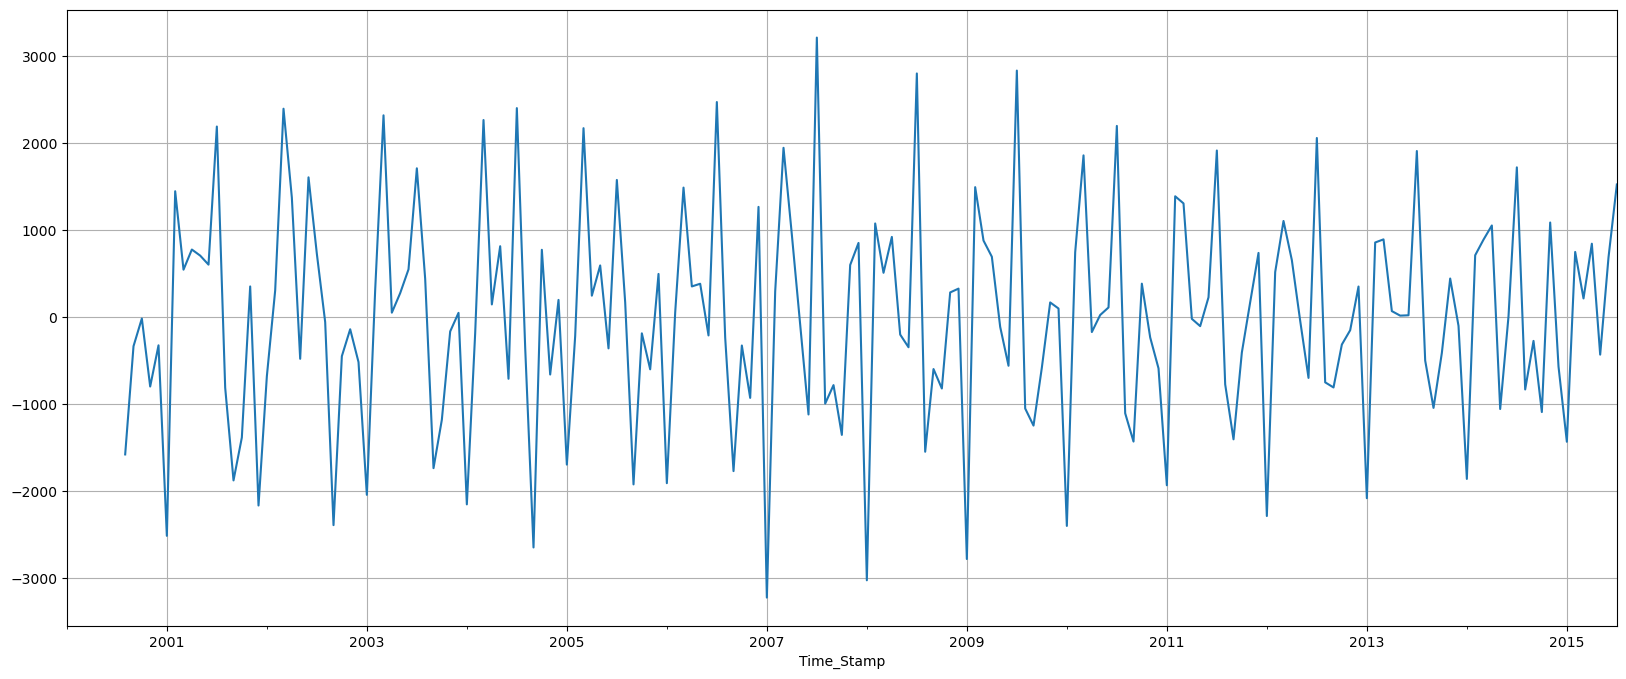

In [77]:
(df['RetailSales'].diff(6)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

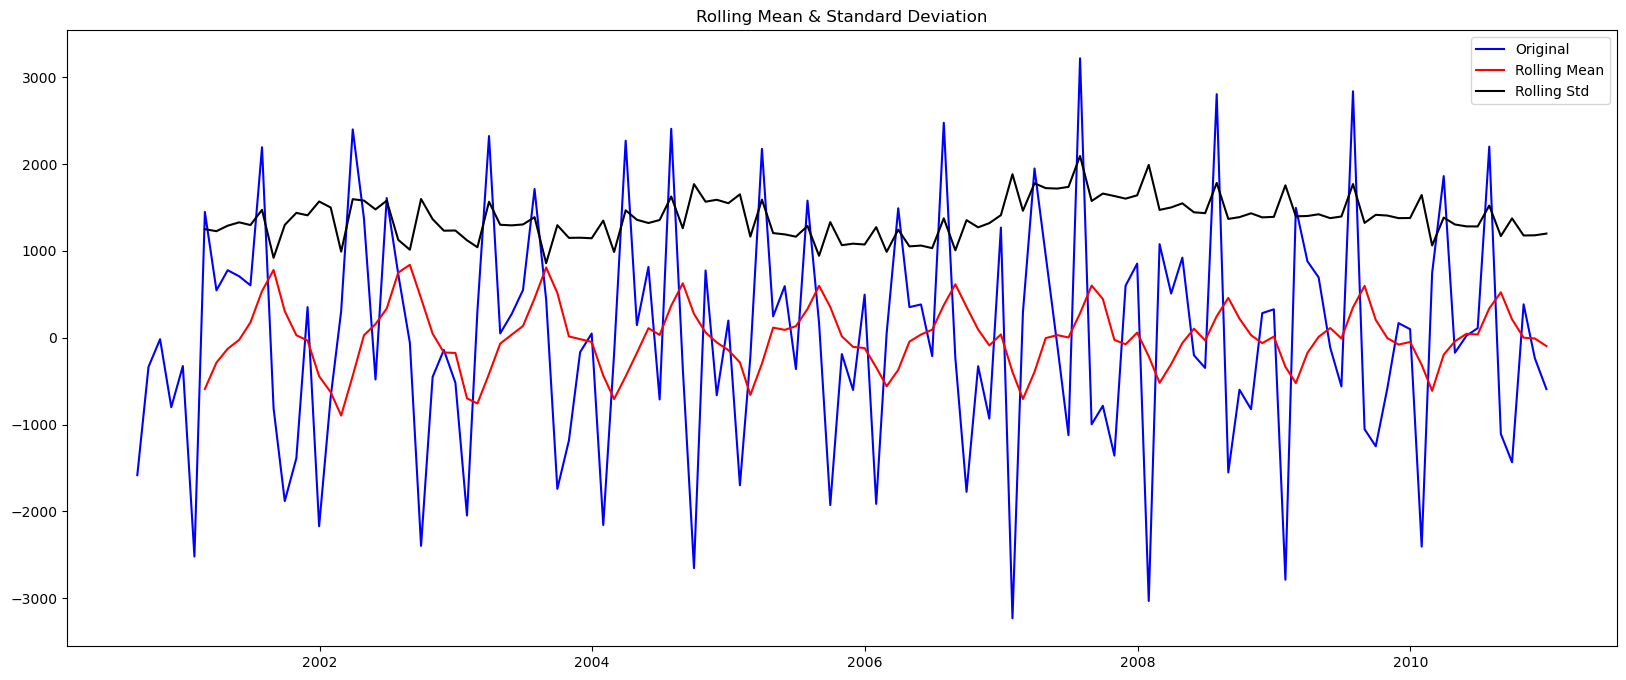

Results of Dickey-Fuller Test:
Test Statistic                -6.977213e+00
p-value                        8.368781e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [78]:
test_stationarity((train['RetailSales'].diff(6).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

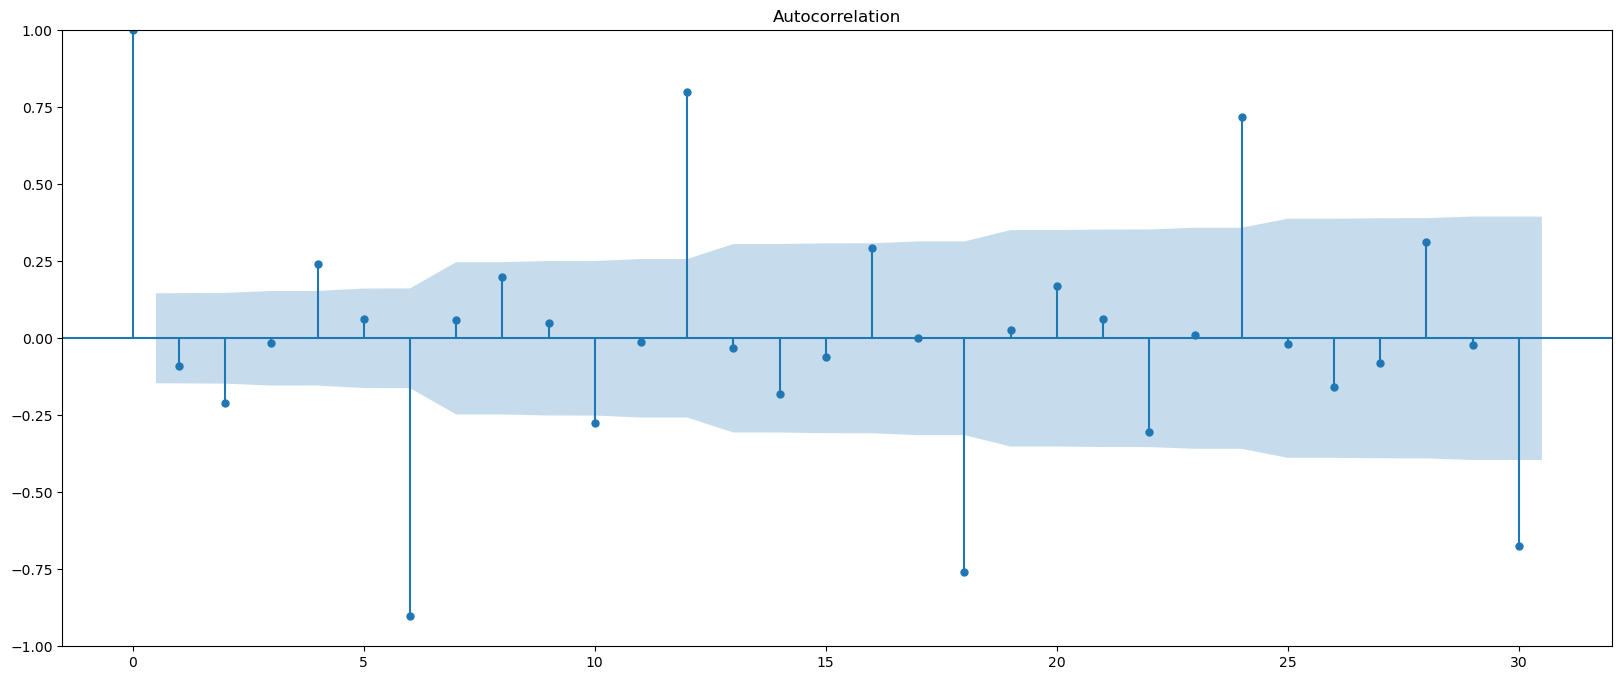

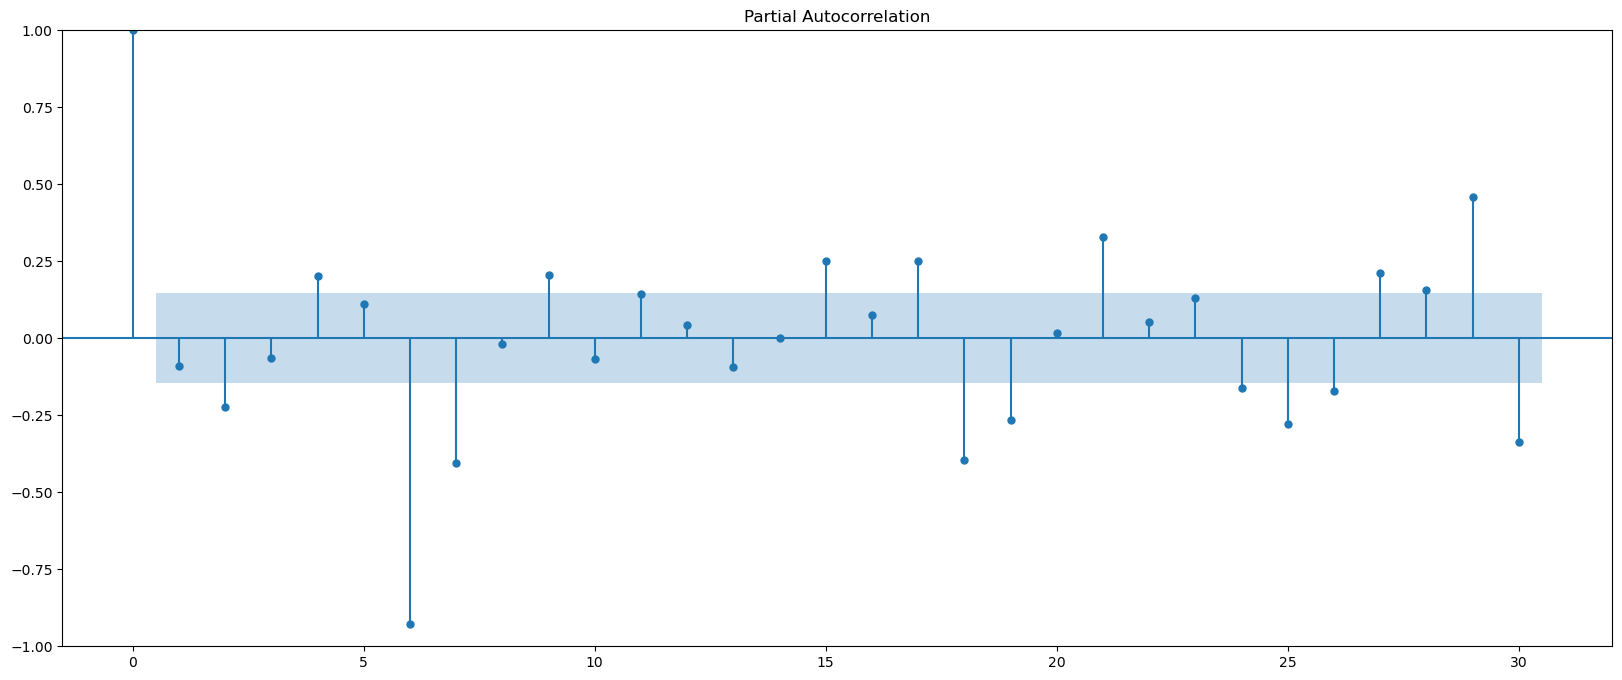

In [79]:
plot_acf((df['RetailSales'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['RetailSales'].diff(6).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [80]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['RetailSales'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -794.676
Date:                                   Fri, 01 Dec 2023   AIC                           1599.352
Time:                                           08:26:47   BIC                           1612.669
Sample:                                                0   HQIC                          1604.749
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.9517      0.037    -25.872      0.000    

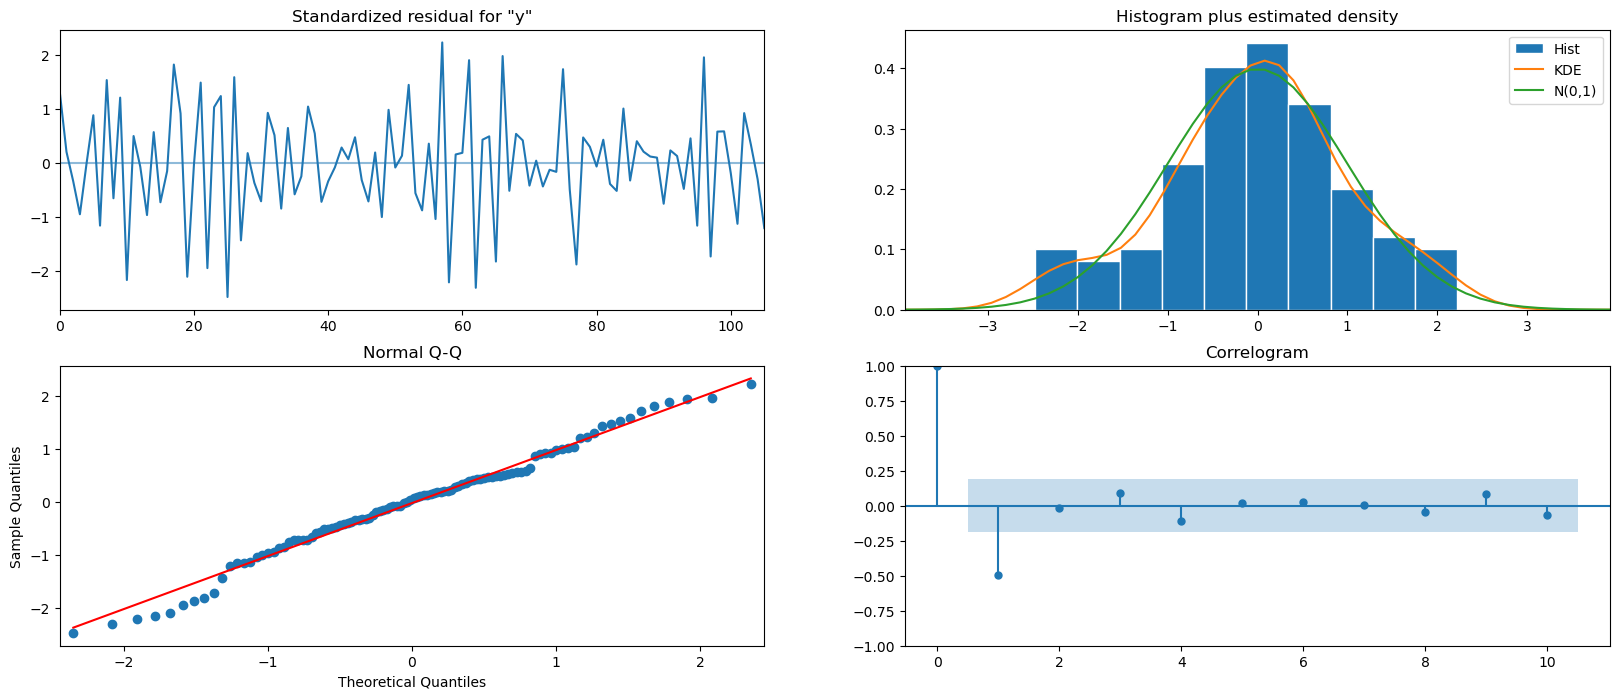

In [81]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

## Predict on the Test Set using this model and evaluate the model.

In [82]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [83]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1098.346405  430.658489     254.271277    1942.421533
1  1354.708208  609.030494     161.030375    2548.386041
2  1884.222473  745.901837     422.281737    3346.163209
3  1842.926545  861.290287     154.828602    3531.024487
4  2400.913041  962.949825     513.566064    4288.260018

In [84]:
rmse = mean_squared_error(test['RetailSales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

771.4129848064765


In [85]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(1,1,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)             755.619683
ARIMA(1,1,1)             771.983146
ARIMA(0,1,0)             611.860040
SARIMA(0,1,2)(2,0,2,6)   228.049673
SARIMA(1,1,2)(2,0,2,12)  273.699969
SARIMA(0,1,0)(1,1,3,6)   771.412985

This is where our model building exercise ends. 

Please do try out with 12 as a seasonal parameter and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

## Building the most optimum model on the Full Data.

In [86]:
full_data_model = sm.tsa.statespace.SARIMAX(df['RetailSales'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                       RetailSales   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood               -1227.004
Date:                           Fri, 01 Dec 2023   AIC                           2468.008
Time:                                   08:26:49   BIC                           2490.000
Sample:                               01-31-2000   HQIC                          2476.932
                                    - 07-31-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9536      0.116     -8.256      0.000      -1.180      -0.727
ma.L2         -0.0464      0.073     -0.631

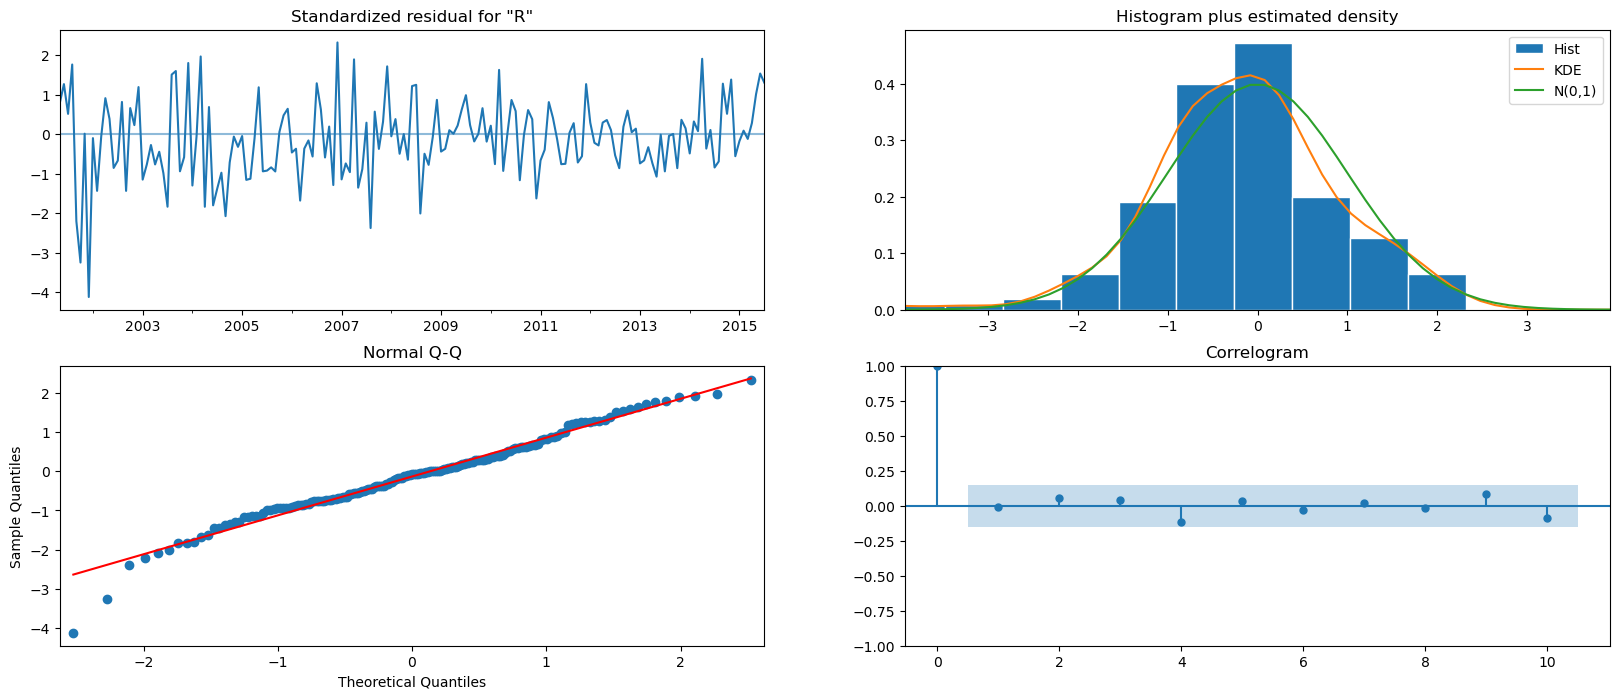

In [87]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole and predict 17 months into the future (till the end of next year).

In [88]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=17)

In [89]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

RetailSales         mean     mean_se  mean_ci_lower  mean_ci_upper
2015-08-31   2355.734260  307.199279    1753.634736    2957.833784
2015-09-30   2087.251876  307.639991    1484.288574    2690.215178
2015-10-31   1829.175520  307.639957    1226.212284    2432.138756
2015-11-30   2417.955122  307.639954    1814.991891    3020.918352
2015-12-31   2454.984816  307.639956    1852.021581    3057.948050

In [90]:
rmse = mean_squared_error(df['RetailSales'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 443.2600034098535


In [91]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='2015-08-31',end='2016-12-31', freq='M'))

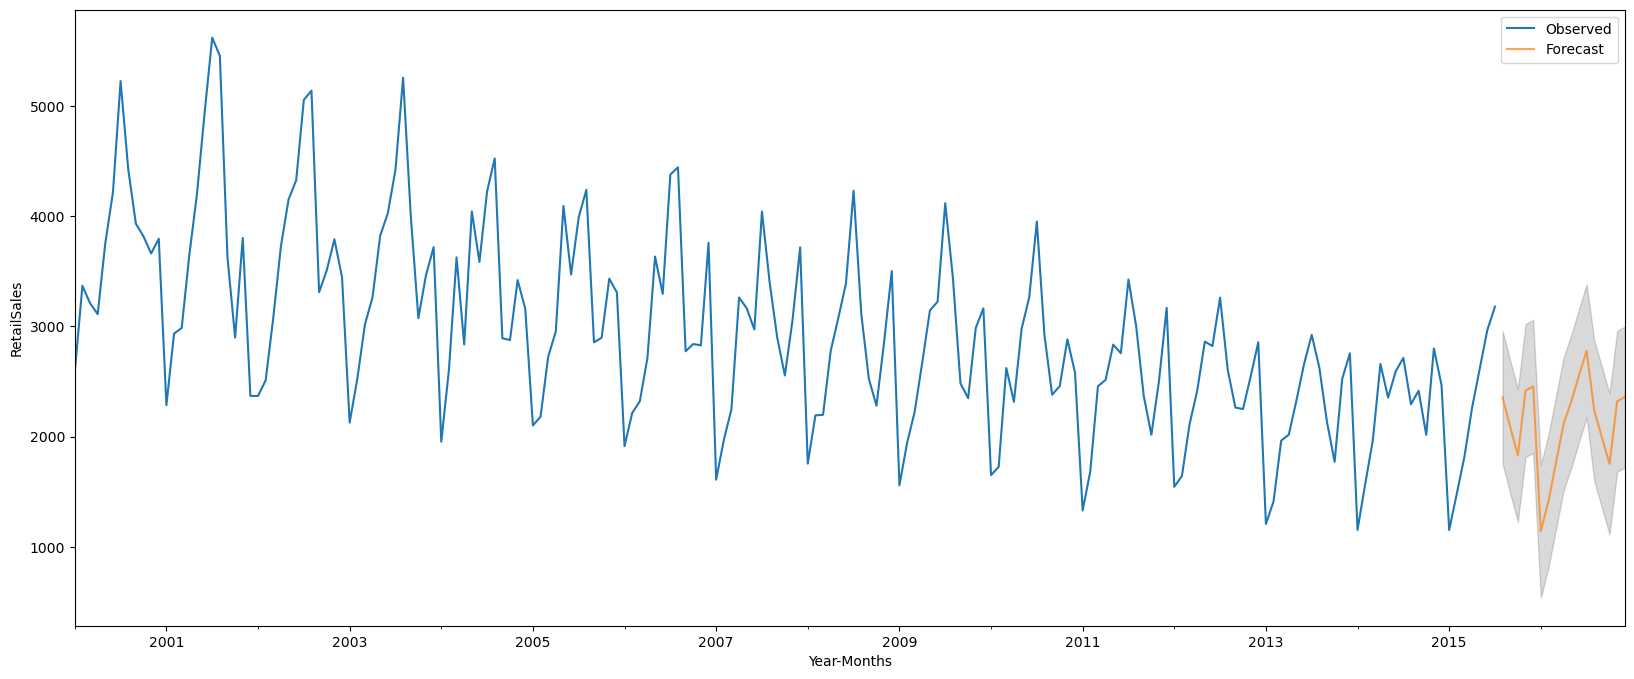

In [92]:
# plot the forecast along with the confidence band

axis = df['RetailSales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()

In [93]:
resultsDf

RMSE
ARIMA(2,1,2)             755.619683
ARIMA(1,1,1)             771.983146
ARIMA(0,1,0)             611.860040
SARIMA(0,1,2)(2,0,2,6)   228.049673
SARIMA(1,1,2)(2,0,2,12)  273.699969
SARIMA(0,1,0)(1,1,3,6)   771.412985

# END